In [1]:
pip install torch gpytorch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 277.8/277.8 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.4/176.4 kB 13.0 MB/s eta 0:00:00


In [9]:
import pandas as pd
import torch

# Load the data
df = pd.read_csv('df_scaled.csv')

df = df.drop_duplicates().dropna()

In [10]:
n_test= round(0.2*  df.shape[0])
n_test
n_train= df.shape[0]-n_test
n_train

84466

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105582 entries, 0 to 164147
Data columns (total 70 columns):
 #   Column                                                         Non-Null Count   Dtype  
---  ------                                                         --------------   -----  
 0   surfaceProcessingLocationCavity                                105582 non-null  float64
 1   hotRunner                                                      105582 non-null  float64
 2   hotRunnerCost                                                  105582 non-null  float64
 3   manufacturingCost                                              105582 non-null  float64
 4   mouldValidationCost                                            105582 non-null  float64
 5   designTime                                                     105582 non-null  float64
 6   hourlyDesignCost                                               105582 non-null  float64
 7   removedChassis                                      

In [12]:
df.head()

,surfaceProcessingLocationCavity,hotRunner,hotRunnerCost,manufacturingCost,mouldValidationCost,designTime,hourlyDesignCost,removedChassis,weightChassisProcessed,surfaceProcessingLocationChassis,...,human health - ionising radiation,human health - respiratory effects (inorganics),human health - total,human health - human toxicity,ecosystem quality - aquatic ecotoxicity,climate change - climate change,human health - ozone layer depletion,ecosystem quality - land occupation,climate change - total,ecosystem quality - total
0,0.5,1.0,1.0,0.5,0.0,0.0,1.0,0.666667,0.0,0.0,...,0.000524,0.001147,0.001123,0.003098,0.001833,0.000650,0.000886,0.002312,0.000650,0.003202
1,0.5,1.0,1.0,0.0,0.5,0.5,0.0,0.000000,0.0,0.0,...,0.000075,0.000045,0.000054,0.000039,0.000029,0.000032,0.000043,0.000055,0.000032,0.000038
2,0.5,0.0,1.0,0.5,1.0,1.0,1.0,0.666667,0.0,0.0,...,0.000522,0.001143,0.001119,0.003088,0.001827,0.000647,0.000883,0.002304,0.000647,0.003192
3,0.5,1.0,0.0,0.0,1.0,0.5,0.0,0.400000,0.0,0.0,...,0.000315,0.000690,0.000675,0.001863,0.001102,0.000391,0.000533,0.001390,0.000391,0.001926
4,0.5,0.0,0.5,0.0,0.5,0.0,1.0,0.400000,0.0,0.0,...,0.000313,0.000686,0.000671,0.001853,0.001096,0.000388,0.000530,0.001382,0.000388,0.001915


In [13]:
from sklearn.preprocessing import MinMaxScaler


In [14]:
#label_col= target= output_variables
label_col=        ['human health - total']

In [15]:
input_variables= ['surfaceProcessingLocationCavity', 'hotRunner',
'hotRunnerCost','manufacturingCost', 'mouldValidationCost',
'designTime','hourlyDesignCost', 'removedChassis', 'weightChassisProcessed',
'surfaceProcessingLocationChassis', 'removedCavity', 'numberOfCavities',
'weightCavityProcessed', 'weightMould',
'totalTransportationPercentage','percentageAircraft', 'percentageLorry', 'percentageTrain','percentageShip', 'totalDistance',
'injectedMaterial_product', 'injectedMaterialCost','percentageRecycledMaterial', 'maxDepth', 'maxWallThickness','productVolume', 'materozzaVolume', 'nAnniProduzione', 'nProdottiAnno',
 'materialDensity', 'tolerance', 'surfaceFinishing', 'cycleTime',
'machineCycleTime',
'maintenanceCost', 'productionCost','transportCost', 'mouldTotalCost',
'injectedMaterial_materozza', 'injectionMouldingProcess','memtiEngineValue', 'steelPrice', 'runnersType', 'mouldMaterialName',
'machineName', 'EUUSMacchina', 'CNMacchina', 'gateDiameter', 'setupTime', 'warmupTime', 'deliveryVolume', 'deliveryPeriod','mouldDesignCostDisplay']

output_variables= ['human health - total',
                   'ecosystem quality - total',
                    'resources - total']

In [16]:
feature_cols= ['nProdottiAnno', 'steelPrice', 'deliveryVolume', 'machineCycleTime',
       'deliveryPeriod', 'maintenanceCost', 'manufacturingCost']

In [29]:
df = df[feature_cols + label_col]

In [30]:
# Assume last column is the target, rest are features
X = df.iloc[:, :-1].values  # Features
y = df.iloc[:, :1].values   # Target
X.shape

(105582, 7)

In [31]:
  # or whatever number you want for n_test
train_x = torch.tensor(X[:n_train], dtype=torch.float32)
train_y = torch.tensor(y[:n_train], dtype=torch.float32)

In [32]:
test_x = train_x[:-n_test]  # Select first 1000 as test data
test_y = train_y[:-n_test]

In [33]:
# prompt: train_x size

print(train_x.size())

torch.Size([84466, 7])


In [34]:
import gpytorch

class SparseGPModel(gpytorch.models.ApproximateGP):
    def __init__(self, inducing_points):
        variational_distribution = gpytorch.variational.CholeskyVariationalDistribution(
            inducing_points.size(0)
        )
        variational_strategy = gpytorch.variational.VariationalStrategy(
            self, inducing_points, variational_distribution, learn_inducing_locations=True
        )
        super(SparseGPModel, self).__init__(variational_strategy)
        self.mean_module = gpytorch.means.ConstantMean()
        self.covar_module = gpytorch.kernels.ScaleKernel(gpytorch.kernels.RBFKernel())

    def forward(self, x):
        mean_x = self.mean_module(x)
        covar_x = self.covar_module(x)
        return gpytorch.distributions.MultivariateNormal(mean_x, covar_x)

# Define Gaussian likelihood
likelihood = gpytorch.likelihoods.GaussianLikelihood()

# Select inducing points from the training data (choose 500 inducing points as an example)
inducing_points = train_x[::160]  # For 80,000 samples, select every 160th point as inducing point

# Instantiate the sparse GP model
model = SparseGPModel(inducing_points)


In [35]:
inducing_points.size(0)

528

In [20]:
pip install botorch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.8/644.8 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 22.6 MB/s eta 0:00:00


In [36]:
import matplotlib.pyplot as plt
import torch
import gpytorch
from botorch.fit import fit_gpytorch_mll
from botorch.acquisition import ExpectedImprovement
from botorch.optim import optimize_acqf

In [37]:
import matplotlib.pyplot as plt
import torch
import gpytorch
from botorch.fit import fit_gpytorch_mll
from botorch.acquisition import ExpectedImprovement
from botorch.optim import optimize_acqf
from botorch.models import SingleTaskGP # Import SingleTaskGP

# Instead of using your custom SparseGPModel, use BoTorch's SingleTaskGP
# which already has the necessary attributes like num_outputs.
model = SingleTaskGP(train_x, train_y, covar_module=gpytorch.kernels.ScaleKernel(gpytorch.kernels.RBFKernel()))

# ... (Rest of your code remains the same) ...

# Fit the model
model.train()
likelihood.train()

# Use the Adam optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)
# Since we are now using a SingleTaskGP, we need to use the appropriate MLL
mll = gpytorch.mlls.ExactMarginalLogLikelihood(likelihood, model)

# ... (Rest of your code remains the same) ...

<ipython-input-37-bedce8c7fa5a>:11: InputDataWarning: The model inputs are of type torch.float32. It is strongly recommended to use double precision in BoTorch, as this improves both precision and stability and can help avoid numerical errors. See https://github.com/pytorch/botorch/discussions/1444
  model = SingleTaskGP(train_x, train_y, covar_module=gpytorch.kernels.ScaleKernel(gpytorch.kernels.RBFKernel()))


In [ ]:
import numpy as np
import torch
import gpytorch
from botorch.models import SingleTaskGP
from botorch.fit import fit_gpytorch_mll
from botorch.acquisition import ExpectedImprovement
from botorch.optim import optimize_acqf
'''
# Define a sparse GP model with inducing points
class SparseGPModel(gpytorch.models.ExactGP):
    def __init__(self, train_x, train_y, likelihood, inducing_points):
        super(SparseGPModel, self).__init__(train_x, train_y, likelihood)
        self.mean_module = gpytorch.means.ConstantMean()
        self.covar_module = gpytorch.kernels.ScaleKernel(
            gpytorch.kernels.RBFKernel()
        )
        self.inducing_points = inducing_points

    def forward(self, x):
        mean_x = self.mean_module(x)
        covar_x = self.covar_module(x, self.inducing_points)
        return gpytorch.distributions.MultivariateNormal(mean_x, covar_x)

likelihood = gpytorch.likelihoods.GaussianLikelihood()
inducing_points = torch.rand(10, 1)  # Sparse inducing points

model = SparseGPModel(train_x, train_y, likelihood, inducing_points)
'''

# Fit the model
model.train()
likelihood.train()

# Use the Adam optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)
mll = gpytorch.mlls.ExactMarginalLogLikelihood(likelihood, model)
# Ensure num_data is set to the number of data points
#mll = gpytorch.mlls.VariationalELBO(likelihood, model, num_data=train_x.size(0))


# Use an acquisition function (Expected Improvement in this case)
acqf = ExpectedImprovement(model=model, best_f=train_y.max())

# Find the next point to evaluate by maximizing the acquisition function
#bounds = torch.tensor([[0.], [1.]])  # Define bounds of the search space
# Create bounds tensor using NumPy and then convert to PyTorch tensor
lower_bounds = np.zeros(7)
upper_bounds = np.ones(7)  # Assuming upper bound is 1 for all features

# Stack lower and upper bounds to create the 2xN bounds tensor
bounds = torch.tensor(np.vstack([lower_bounds, upper_bounds]), dtype=torch.float)


candidate, _ = optimize_acqf(acqf, bounds=bounds, q=1, num_restarts=5, raw_samples=20)

# Evaluate the objective function at the new candidate point
new_y = objective_function(candidate)

# Update training data and repeat
train_x = torch.cat([train_x, candidate])
train_y = torch.cat([train_y, new_y])
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)
mll = gpytorch.mlls.ExactMarginalLogLikelihood(likelihood, model)
fit_gpytorch_mll(mll)

# Use an acquisition function (Expected Improvement in this case)
acqf = ExpectedImprovement(model=model, best_f=train_y.max())

# Find the next point to evaluate by maximizing the acquisition function
bounds = torch.tensor([[0.], [1.]])  # Define bounds of the search space
candidate, _ = optimize_acqf(acqf, bounds=bounds, q=1, num_restarts=5, raw_samples=20)

# Evaluate the objective function at the new candidate point
new_y = objective_function(candidate)

# Update training data and repeat
train_x = torch.cat([train_x, candidate])
train_y = torch.cat([train_y, new_y])


/usr/local/lib/python3.10/dist-packages/botorch/acquisition/analytic.py:332: NumericsWarning: ExpectedImprovement has known numerical issues that lead to suboptimal optimization performance. It is strongly recommended to simply replace

	 ExpectedImprovement 	 --> 	 LogExpectedImprovement 

instead, which fixes the issues and has the same API. See https://arxiv.org/abs/2310.20708 for details.
  legacy_ei_numerics_warning(legacy_name=type(self).__name__)


In [ ]:
model.train()
likelihood.train()

# Use the Adam optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)
#mll = gpytorch.mlls.ExactMarginalLogLikelihood(likelihood, model)
mll = gpytorch.mlls.VariationalELBO(likelihood, model, num_data=train_y.size(0))

fit_gpytorch_mll(mll)

# Use an acquisition function (Expected Improvement in this case)
acqf = ExpectedImprovement(model=model, best_f=train_y.max())

# Find the next point to evaluate by maximizing the acquisition function
bounds = torch.tensor([[0.], [1.]])  # Define bounds of the search space
candidate, _ = optimize_acqf(acqf, bounds=bounds, q=1, num_restarts=5, raw_samples=20)

# Evaluate the objective function at the new candidate point
new_y = objective_function(candidate)

# Update training data and repeat
train_x = torch.cat([train_x, candidate])
train_y = torch.cat([train_y, new_y])

RuntimeError: LinearOperator#diagonal is only implemented for square operators.

Iter 1/200 - Loss: 1.140


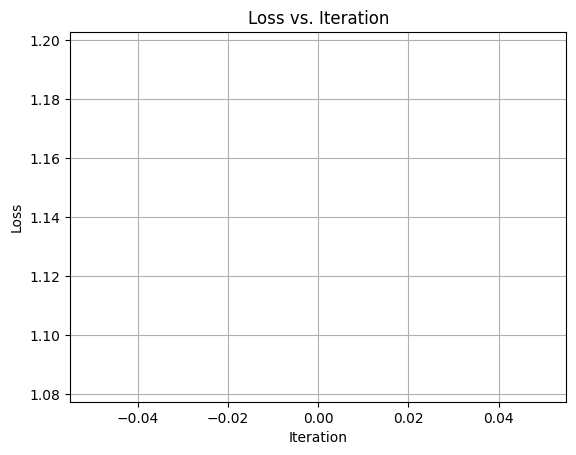

Iter 3/200 - Loss: 1.105


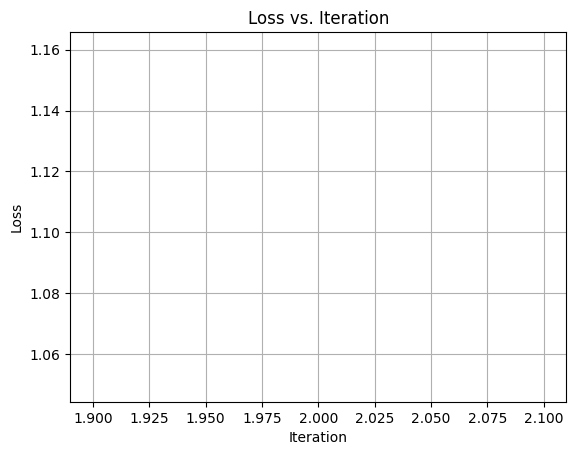

Iter 5/200 - Loss: 1.068


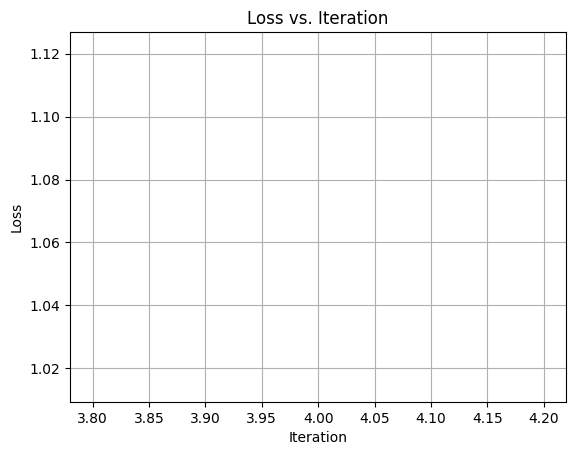

Iter 7/200 - Loss: 1.044


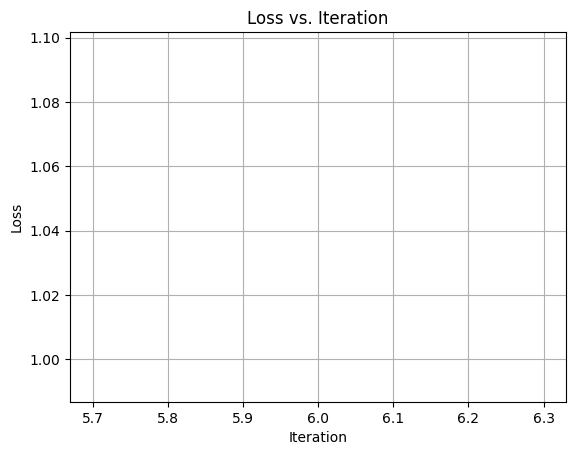

Iter 9/200 - Loss: 1.018


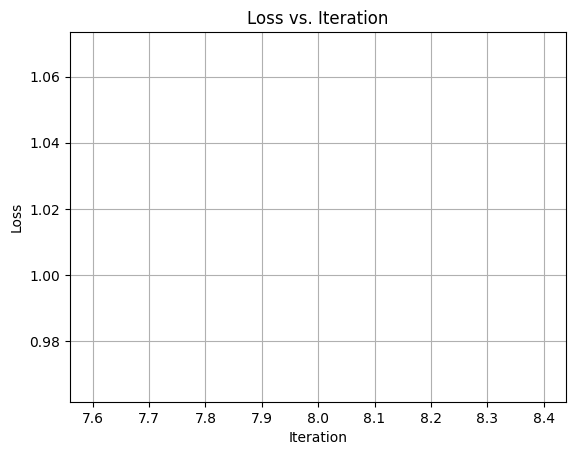

Iter 11/200 - Loss: 0.994


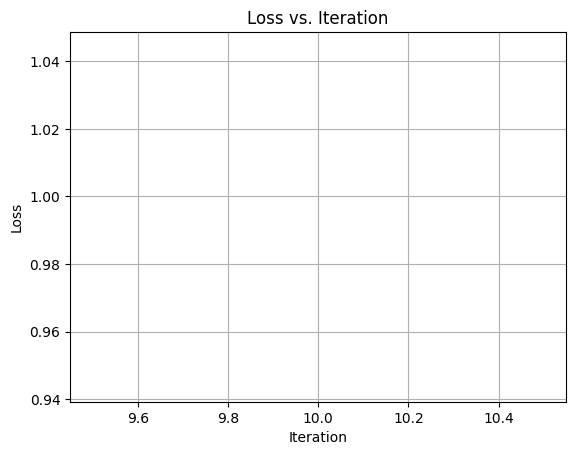

Iter 13/200 - Loss: 0.973


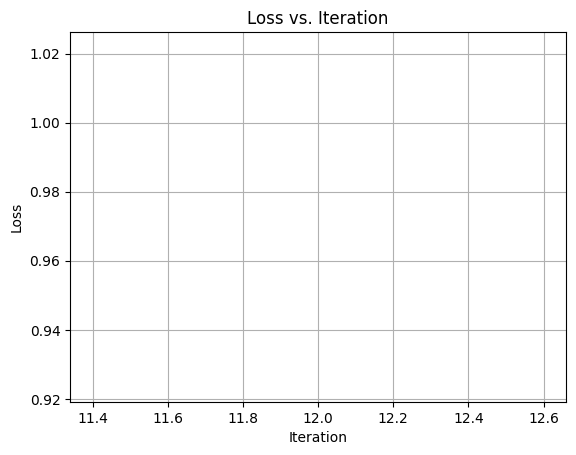

Iter 15/200 - Loss: 0.951


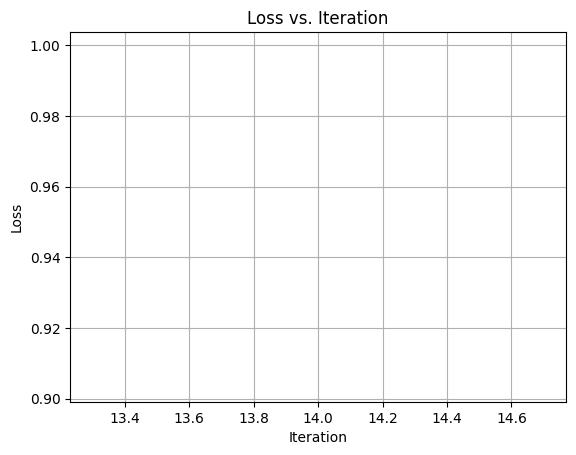

Iter 17/200 - Loss: 0.933


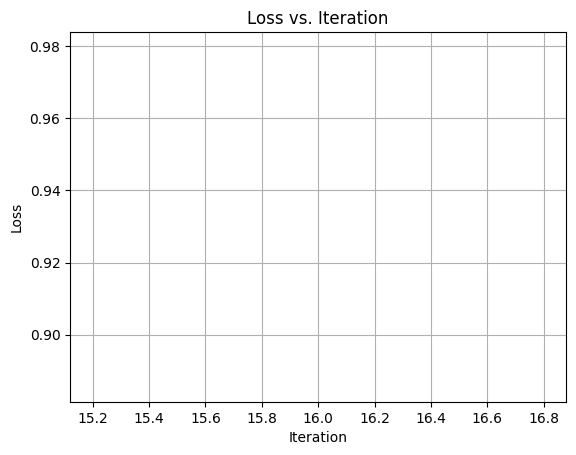

Iter 19/200 - Loss: 0.914


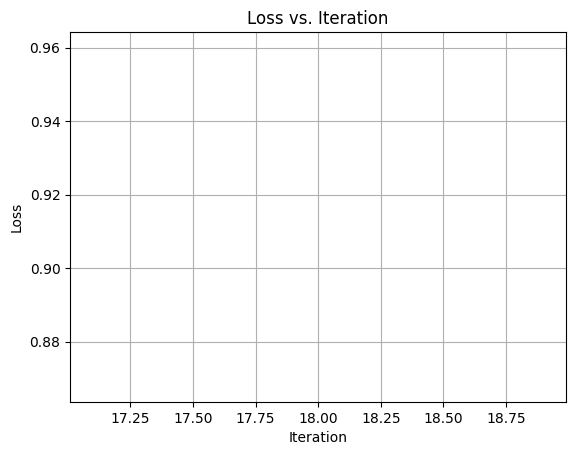

Iter 21/200 - Loss: 0.896


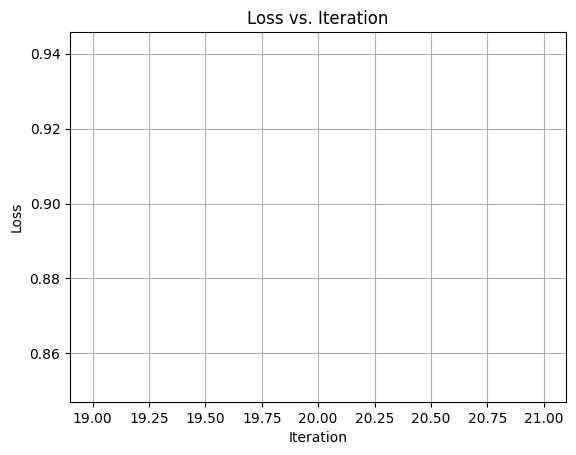

Iter 23/200 - Loss: 0.879


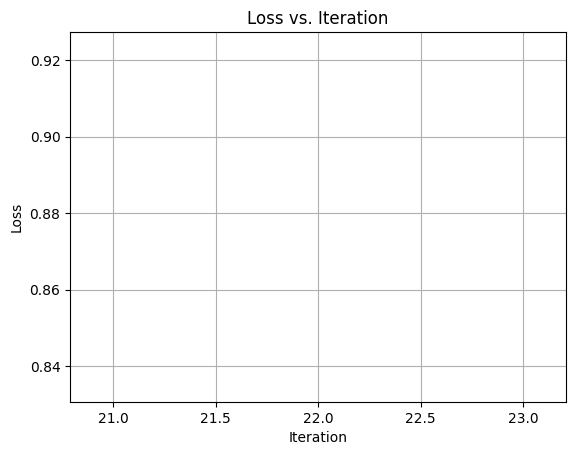

Iter 25/200 - Loss: 0.862


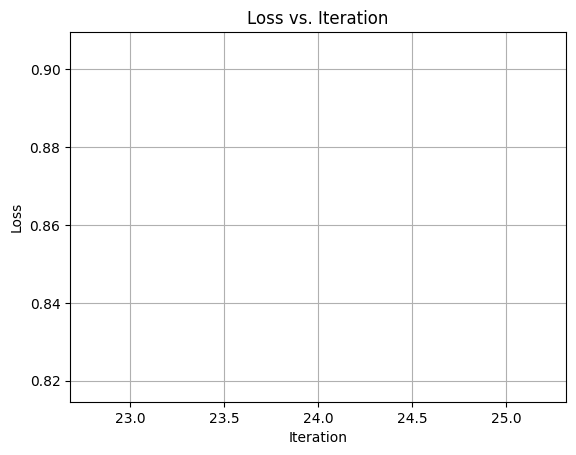

Iter 27/200 - Loss: 0.845


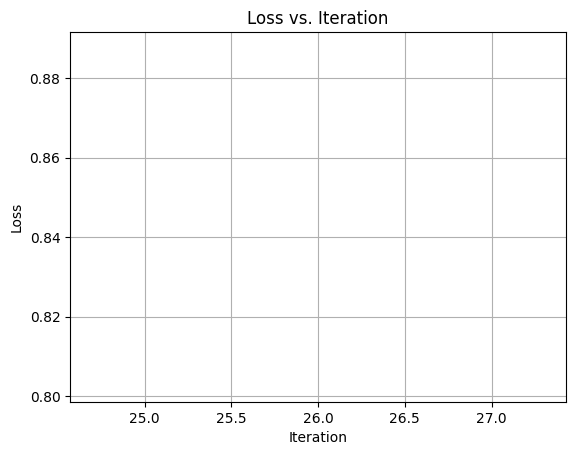

Iter 29/200 - Loss: 0.828


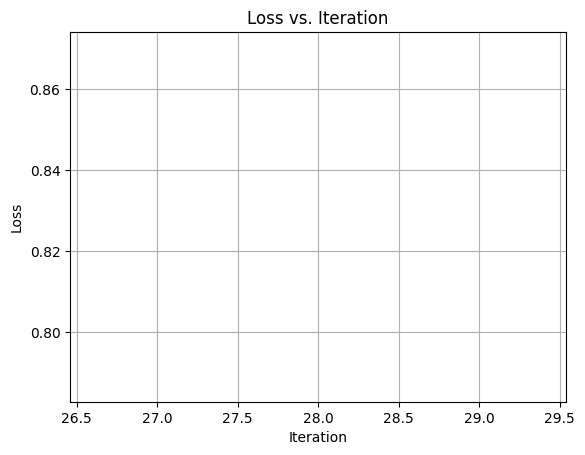

Iter 31/200 - Loss: 0.812


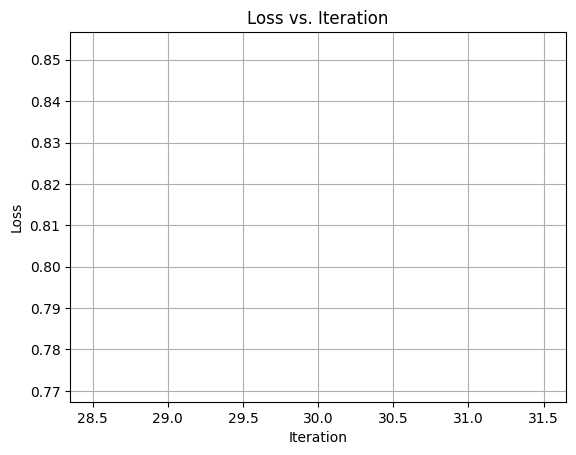

Iter 33/200 - Loss: 0.796


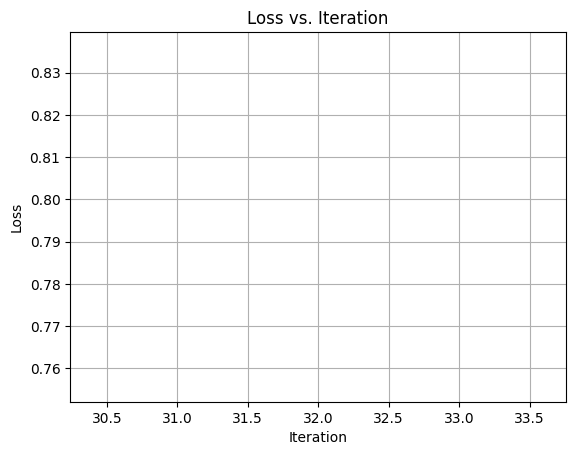

Iter 35/200 - Loss: 0.780


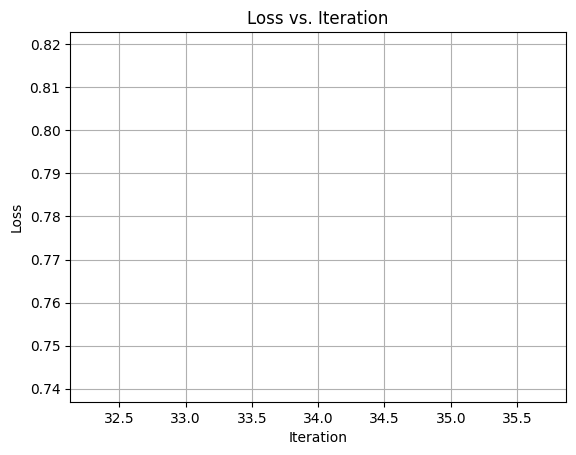

Iter 37/200 - Loss: 0.764


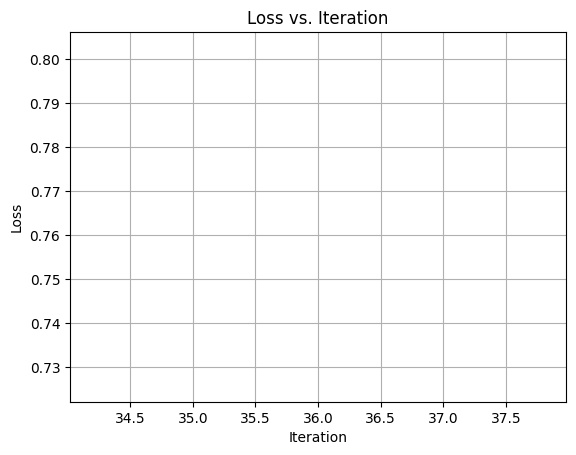

Iter 39/200 - Loss: 0.749


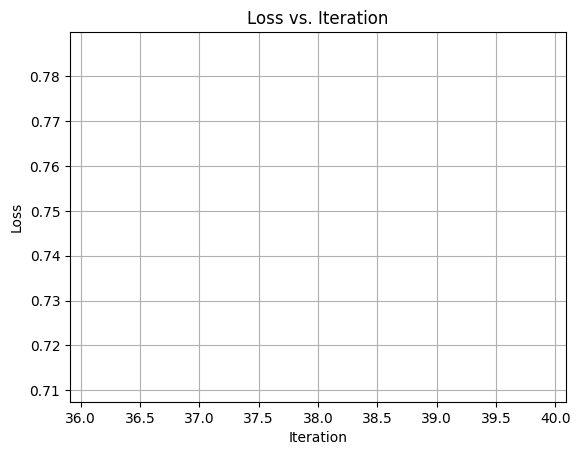

Iter 41/200 - Loss: 0.733


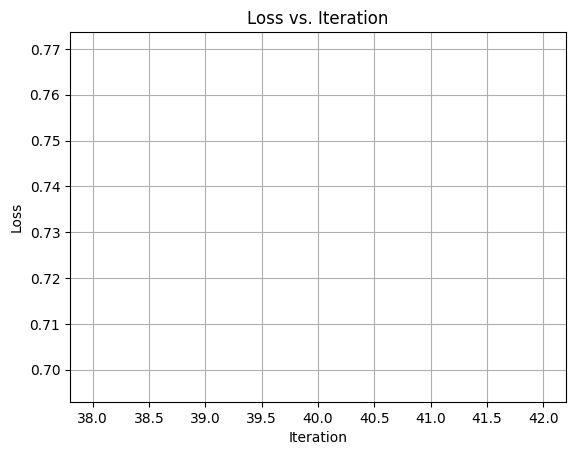

Iter 43/200 - Loss: 0.718


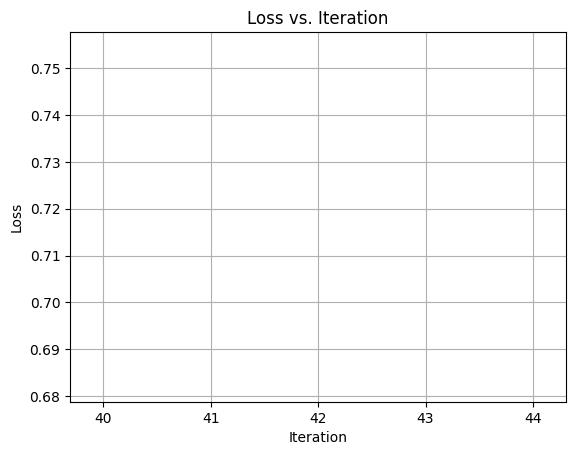

Iter 45/200 - Loss: 0.703


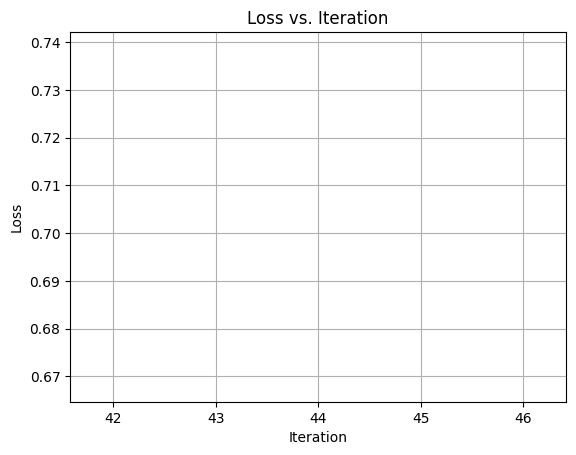

Iter 47/200 - Loss: 0.689


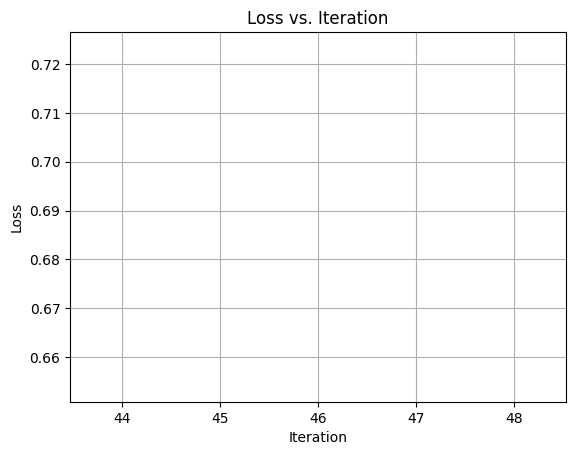

Iter 49/200 - Loss: 0.674


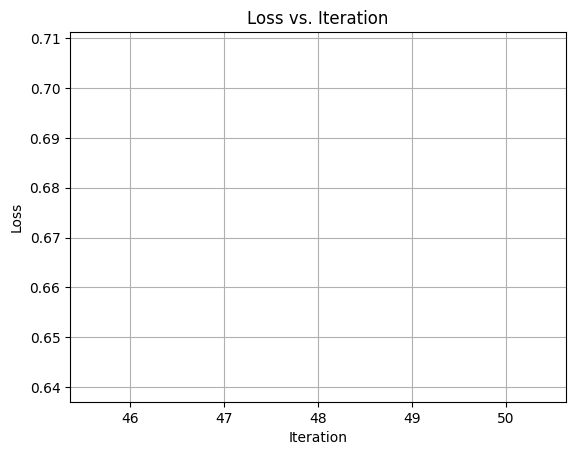

Iter 51/200 - Loss: 0.660


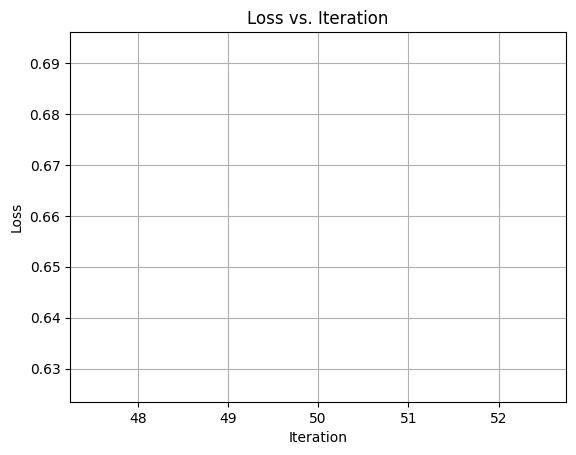

Iter 53/200 - Loss: 0.646


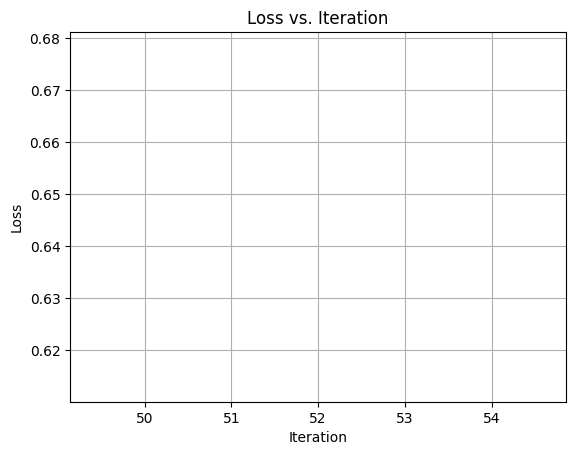

Iter 55/200 - Loss: 0.632


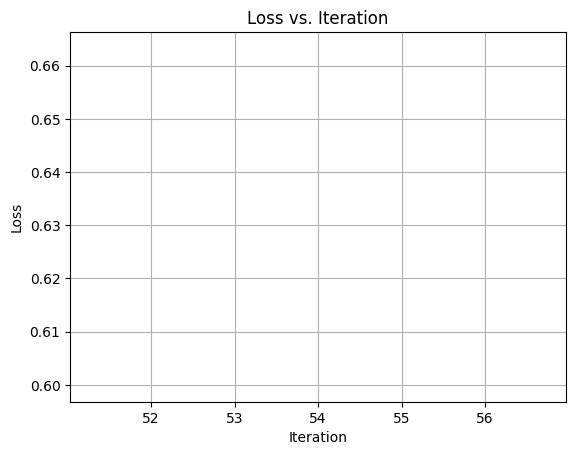

Iter 57/200 - Loss: 0.618


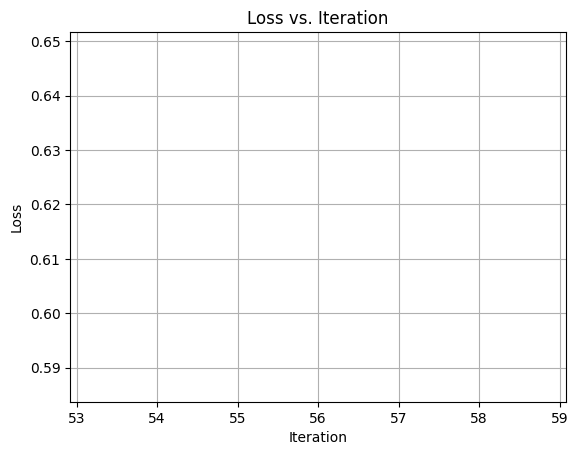

Iter 59/200 - Loss: 0.604


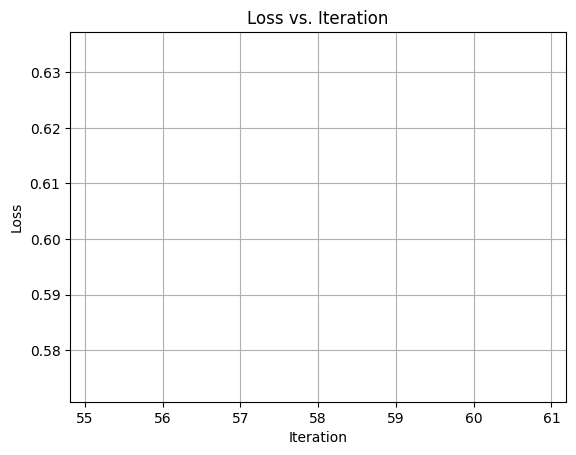

Iter 61/200 - Loss: 0.590


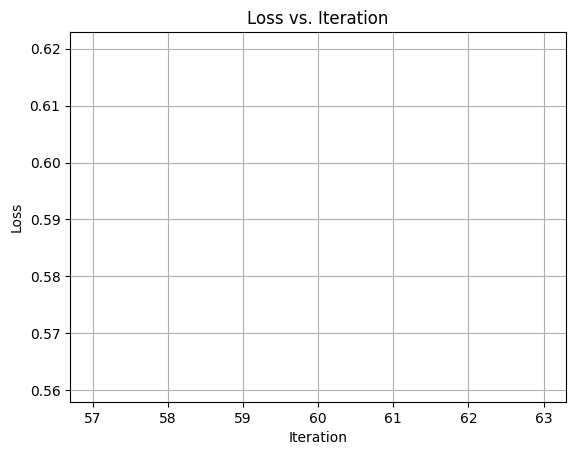

Iter 63/200 - Loss: 0.577


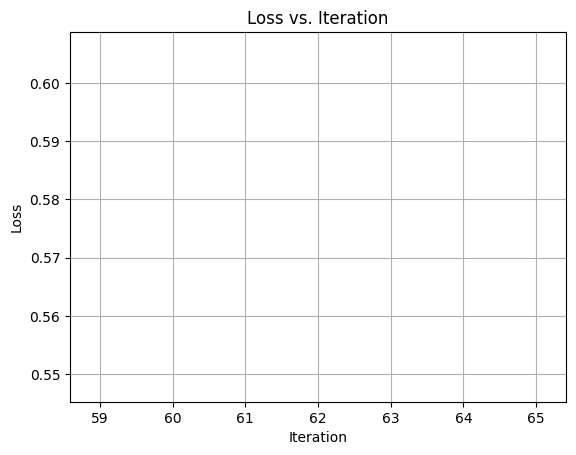

Iter 65/200 - Loss: 0.564


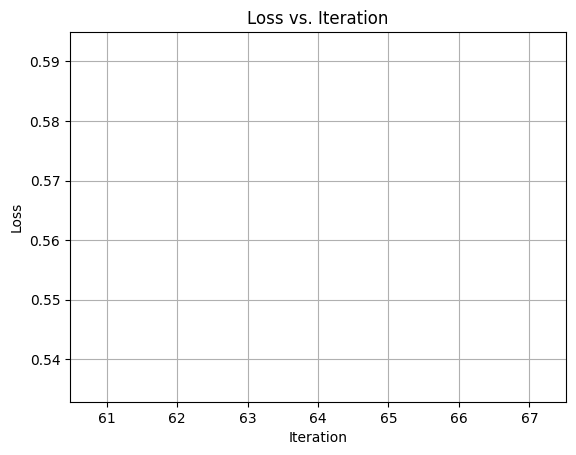

Iter 67/200 - Loss: 0.551


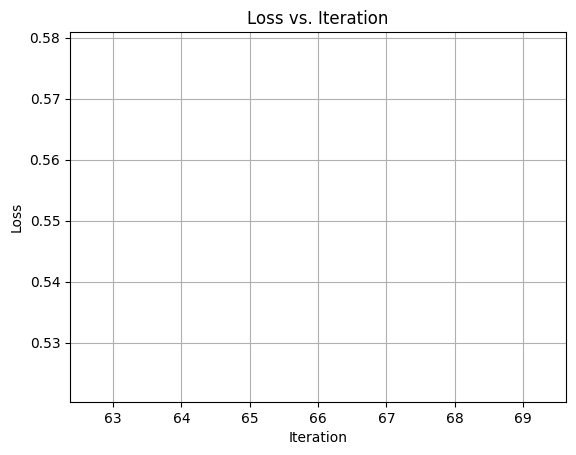

Iter 69/200 - Loss: 0.538


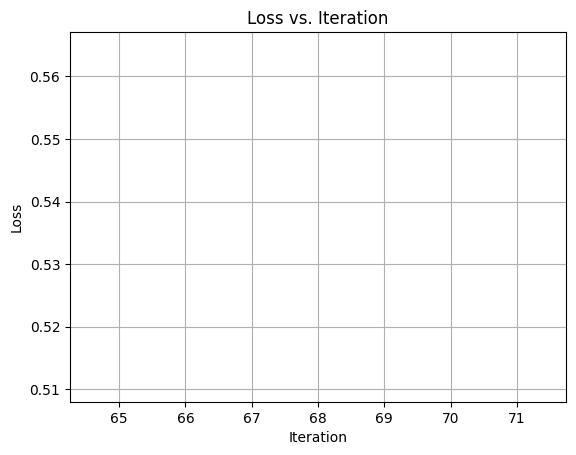

Iter 71/200 - Loss: 0.525


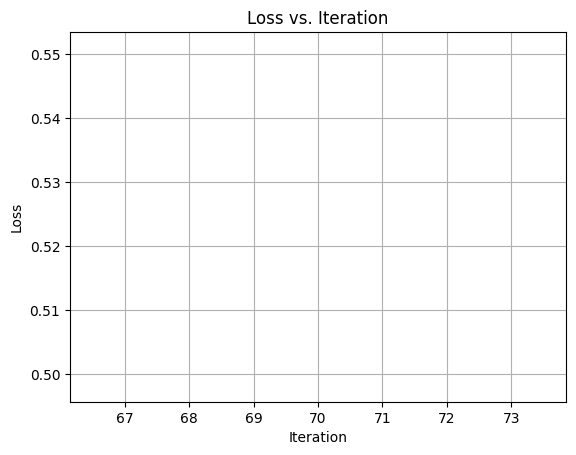

Iter 73/200 - Loss: 0.512


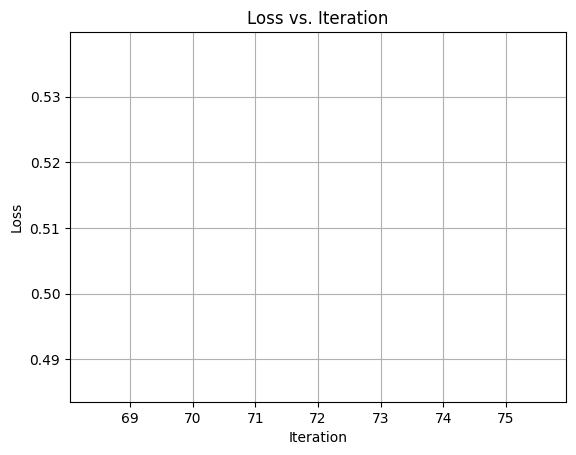

Iter 75/200 - Loss: 0.499


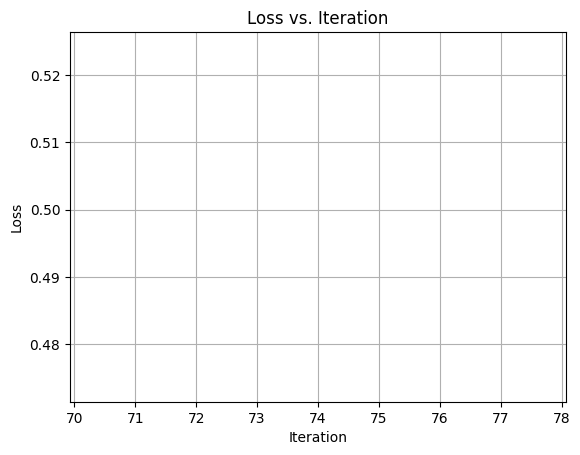

Iter 77/200 - Loss: 0.486


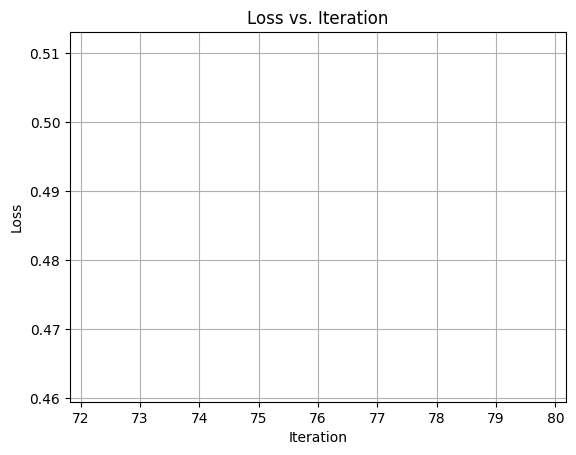

Iter 79/200 - Loss: 0.474


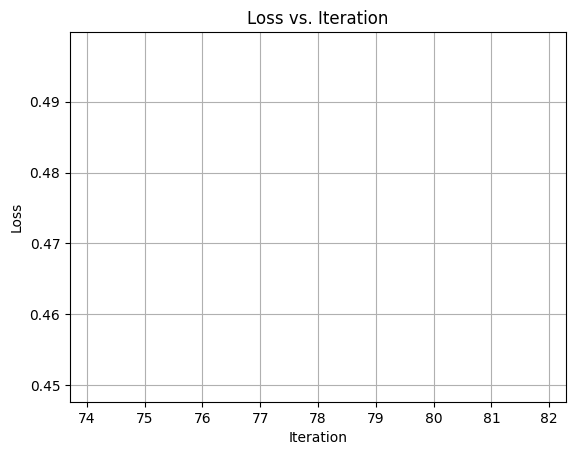

Iter 81/200 - Loss: 0.461


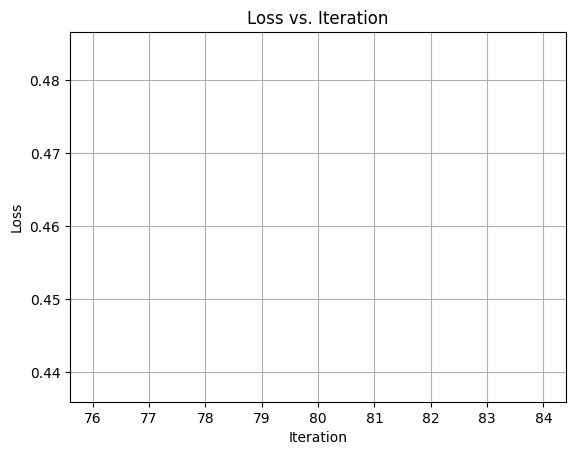

Iter 83/200 - Loss: 0.449


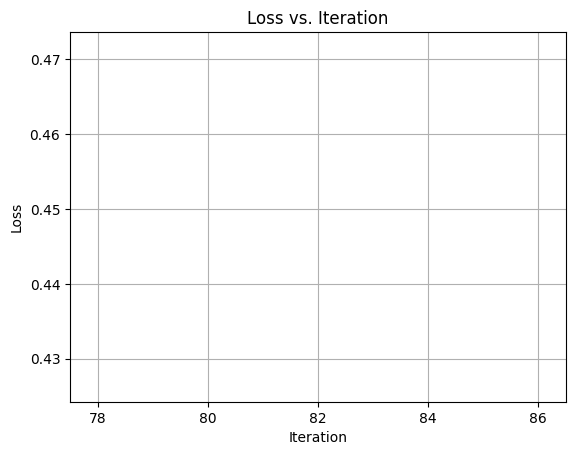

Iter 85/200 - Loss: 0.437


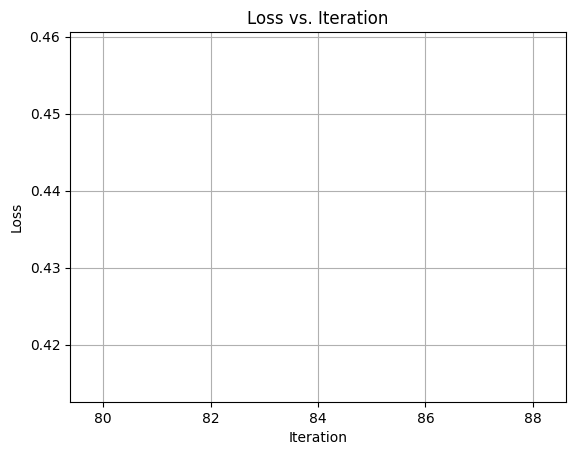

Iter 87/200 - Loss: 0.424


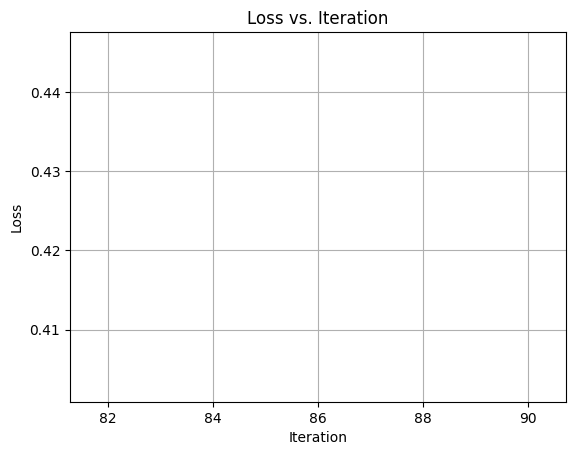

Iter 89/200 - Loss: 0.412


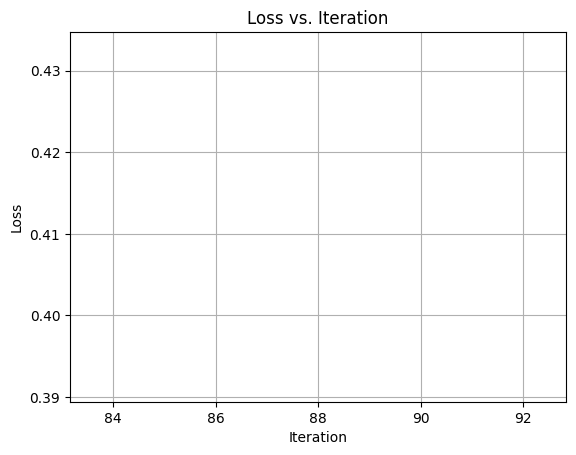

Iter 91/200 - Loss: 0.400


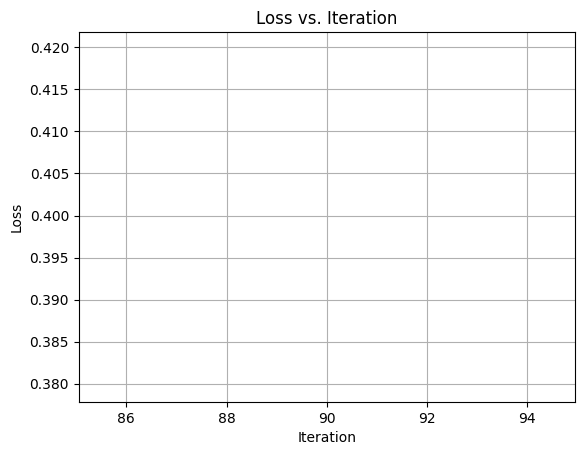

Iter 93/200 - Loss: 0.388


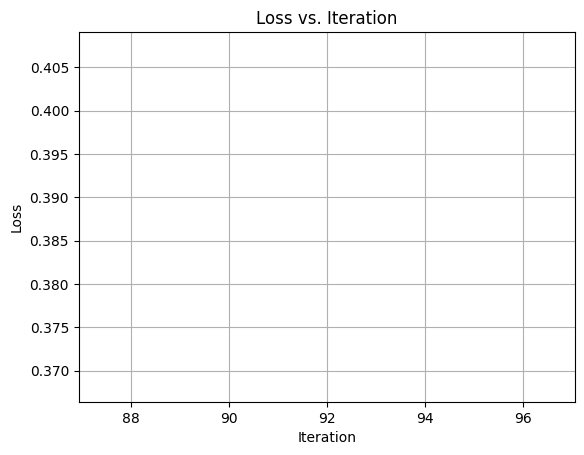

Iter 95/200 - Loss: 0.376


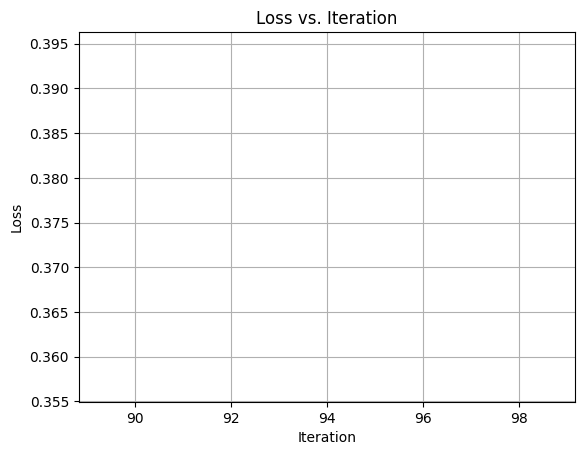

Iter 97/200 - Loss: 0.364


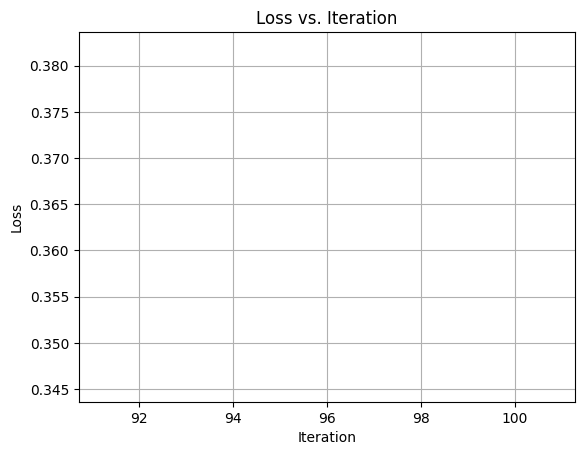

Iter 99/200 - Loss: 0.352


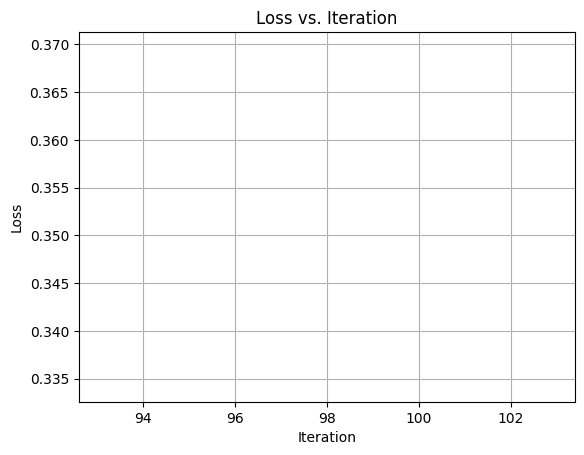

Iter 101/200 - Loss: 0.340


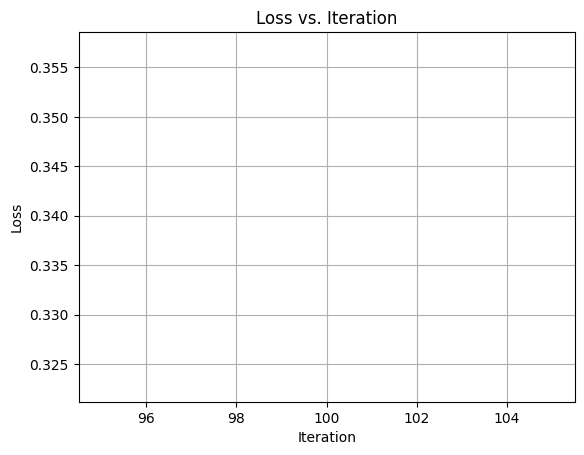

Iter 103/200 - Loss: 0.328


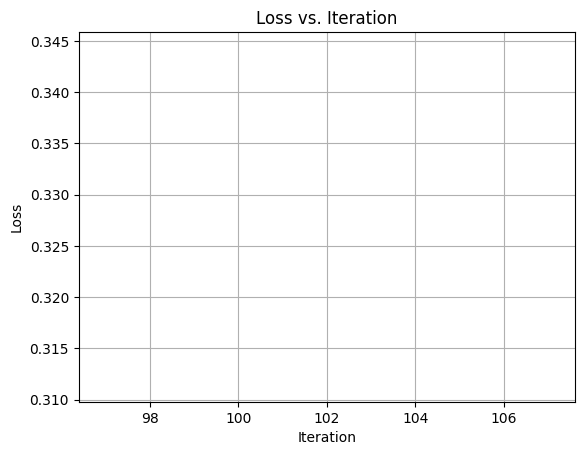

Iter 105/200 - Loss: 0.316


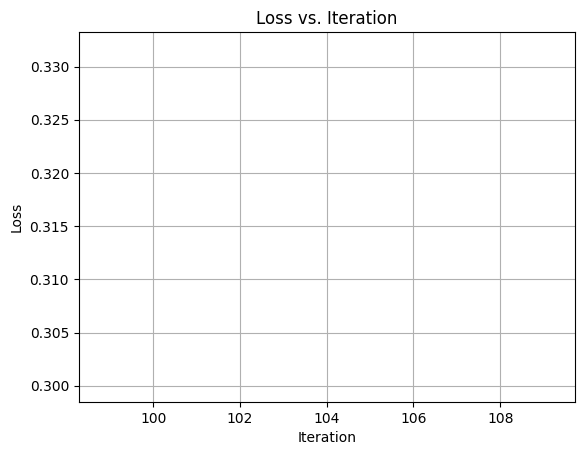

Iter 107/200 - Loss: 0.304


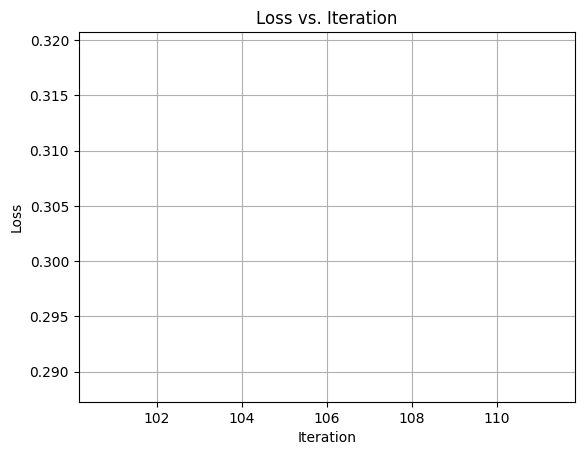

Iter 109/200 - Loss: 0.292


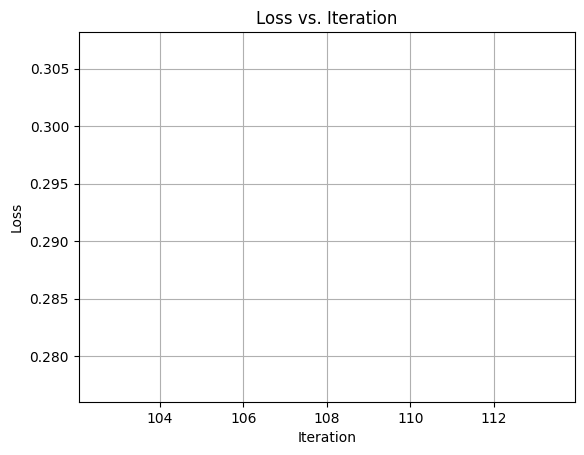

Iter 111/200 - Loss: 0.280


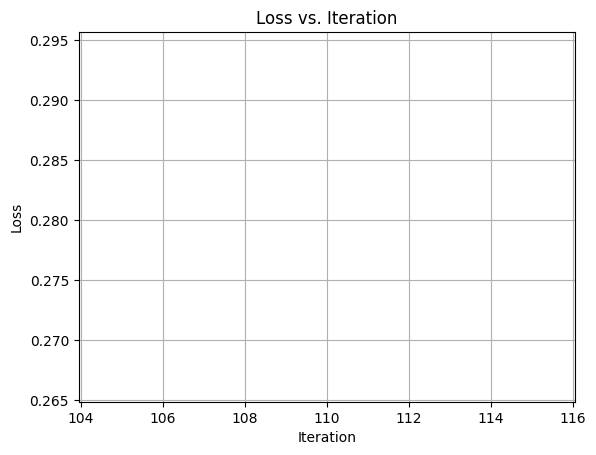

Iter 113/200 - Loss: 0.269


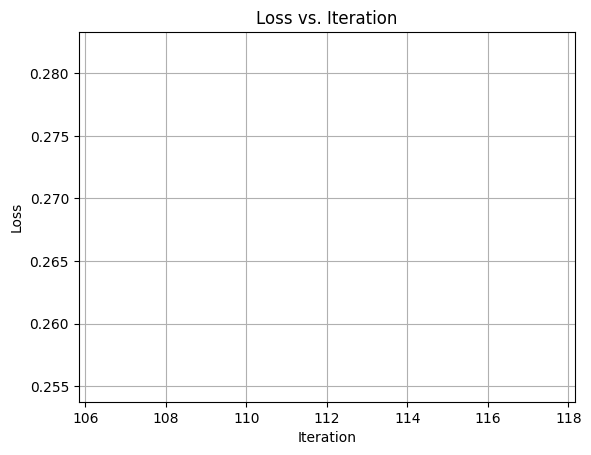

Iter 115/200 - Loss: 0.257


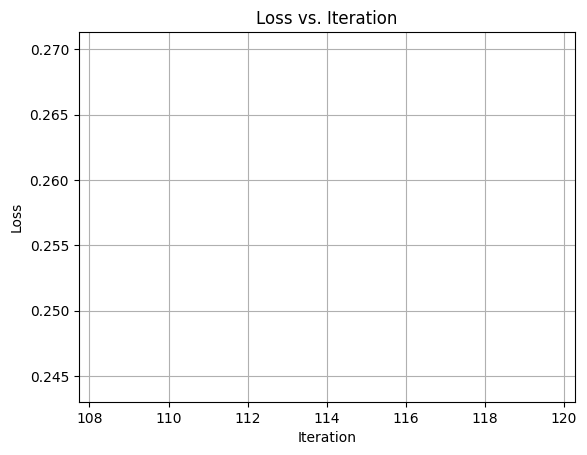

Iter 117/200 - Loss: 0.246


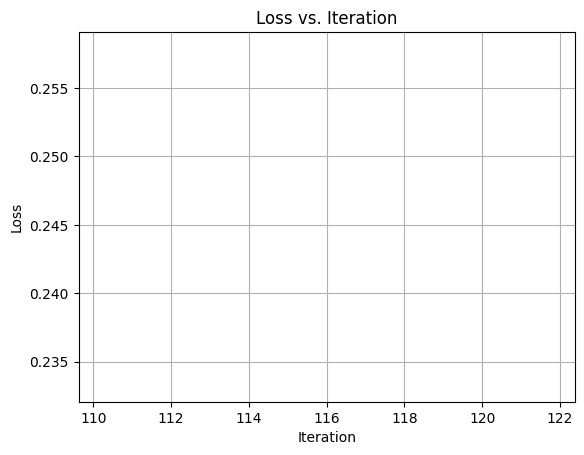

Iter 119/200 - Loss: 0.234


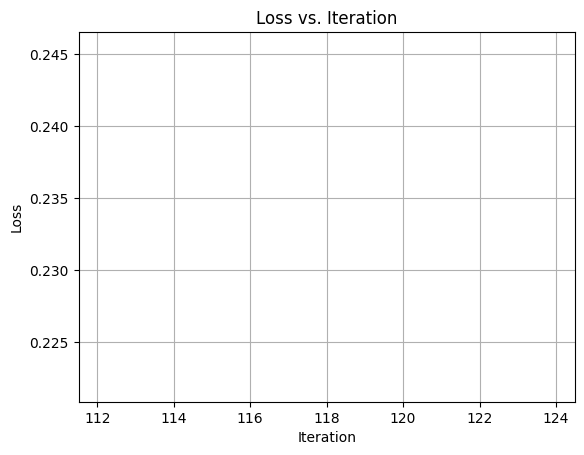

Iter 121/200 - Loss: 0.222


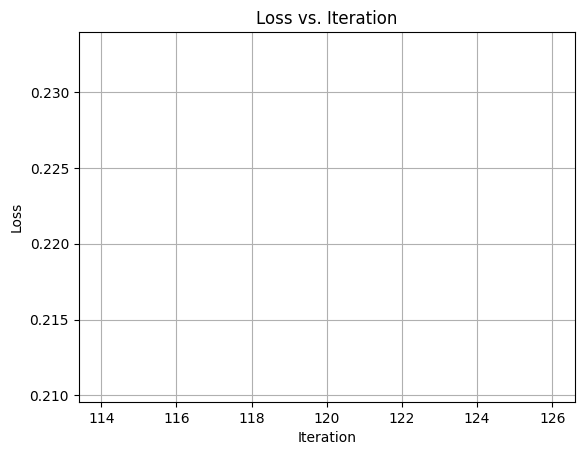

Iter 123/200 - Loss: 0.210


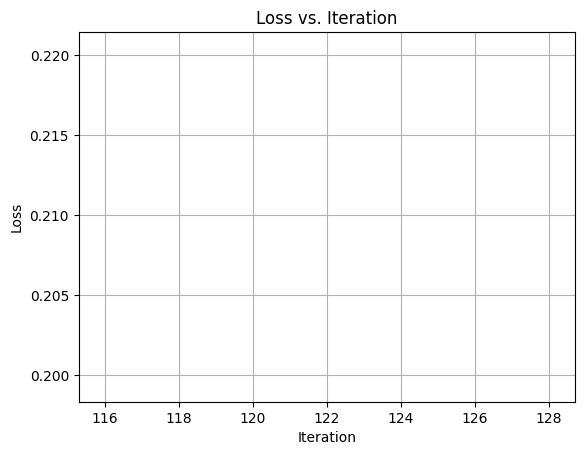

Iter 125/200 - Loss: 0.198


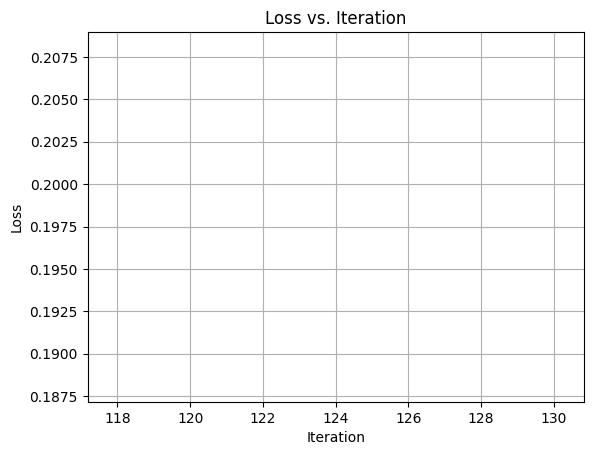

Iter 127/200 - Loss: 0.186


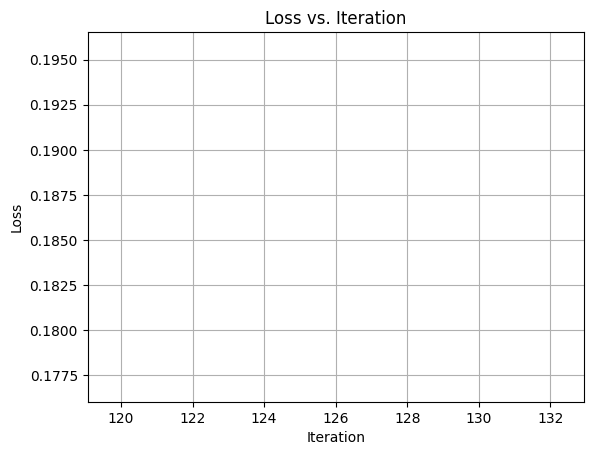

Iter 129/200 - Loss: 0.174


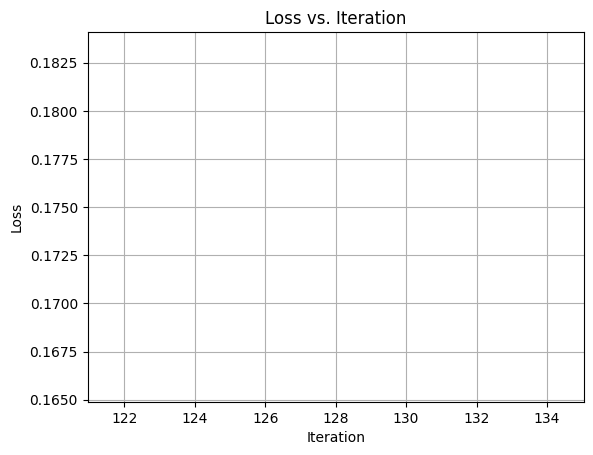

Iter 131/200 - Loss: 0.163


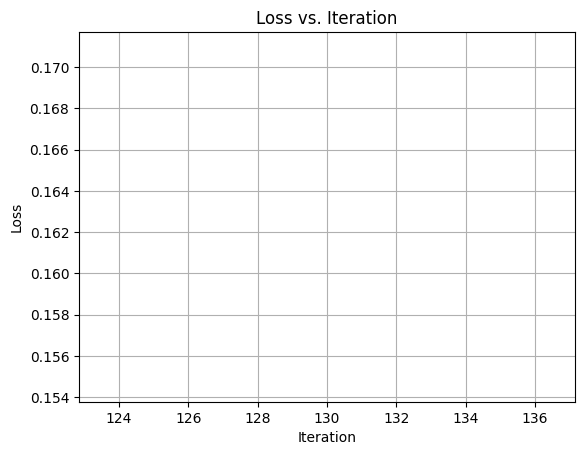

Iter 133/200 - Loss: 0.151


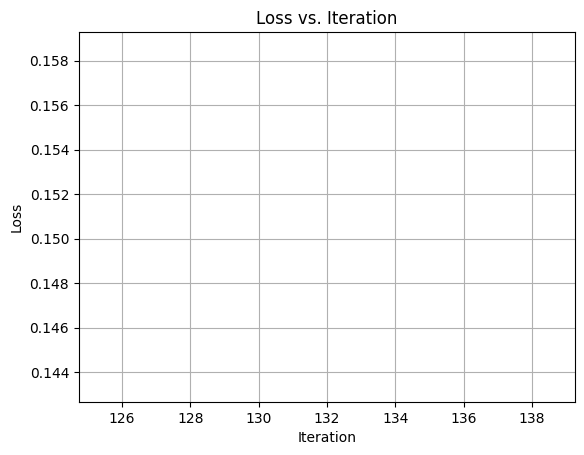

Iter 135/200 - Loss: 0.139


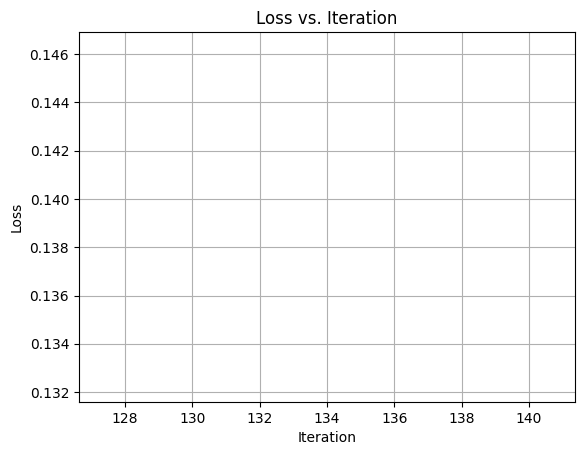

Iter 137/200 - Loss: 0.128


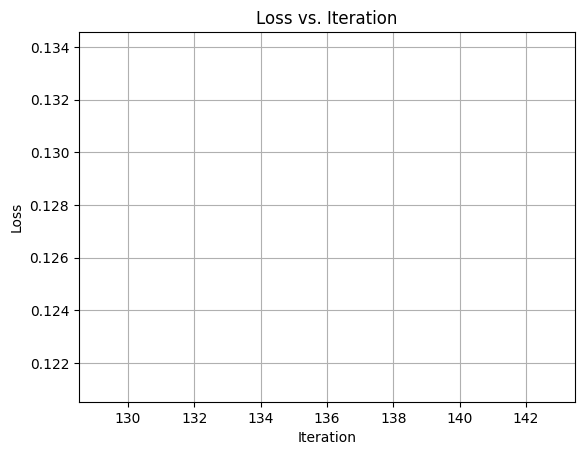

Iter 139/200 - Loss: 0.117


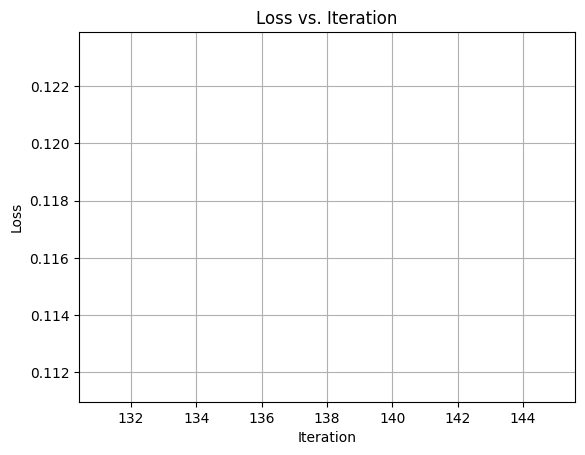

Iter 141/200 - Loss: 0.106


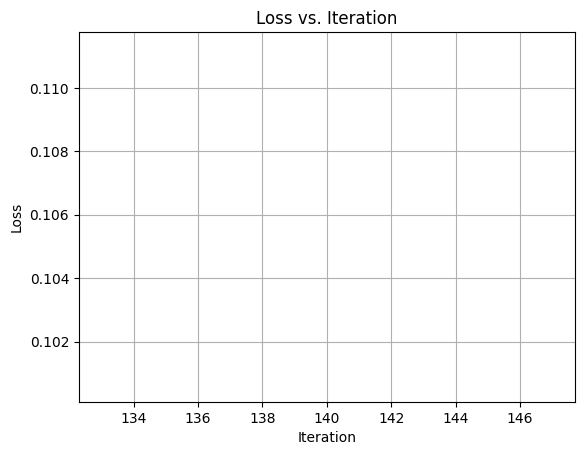

Iter 143/200 - Loss: 0.094


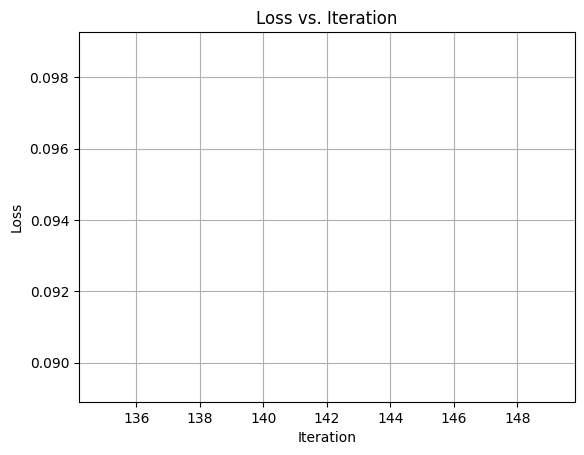

Iter 145/200 - Loss: 0.082


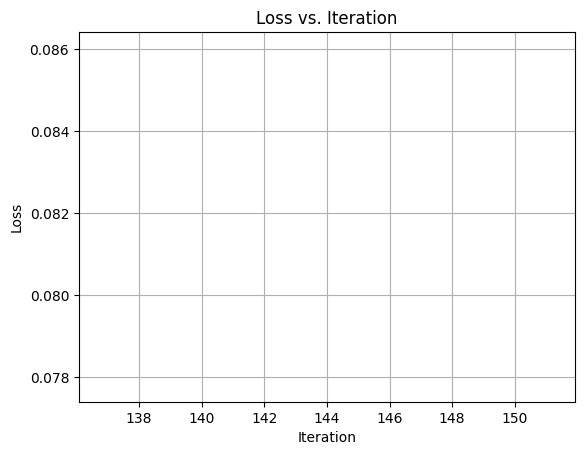

Iter 147/200 - Loss: 0.070


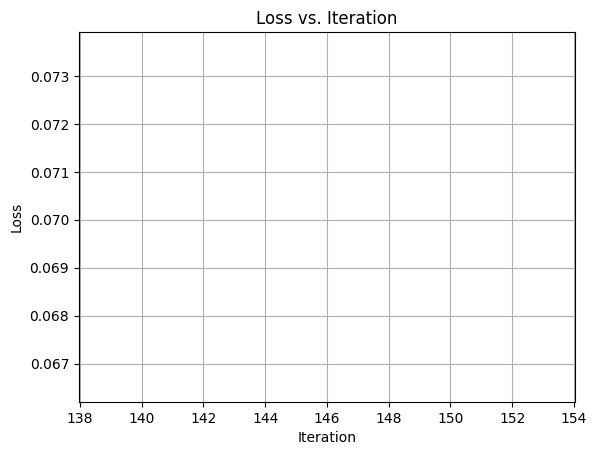

Iter 149/200 - Loss: 0.058


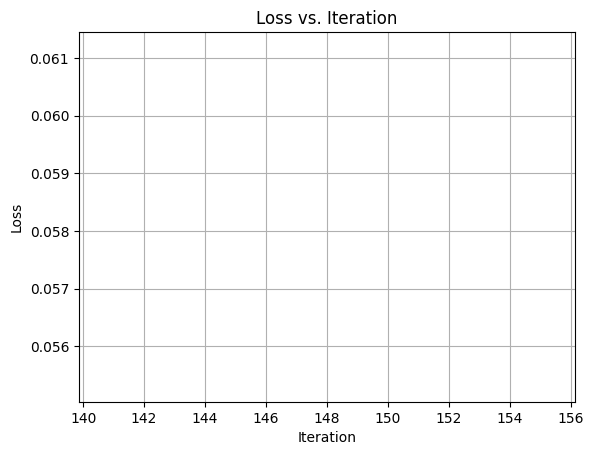

Iter 151/200 - Loss: 0.046


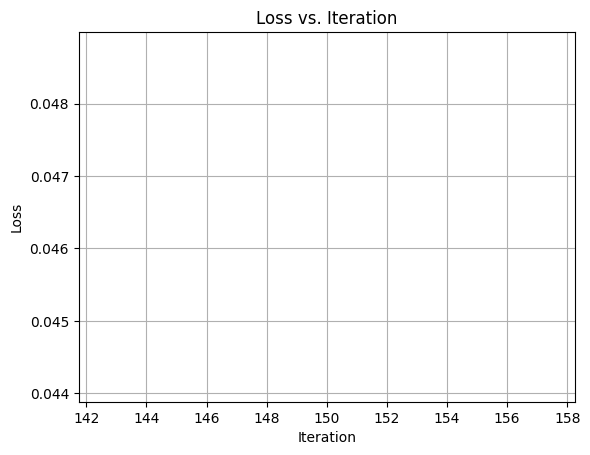

Iter 153/200 - Loss: 0.035


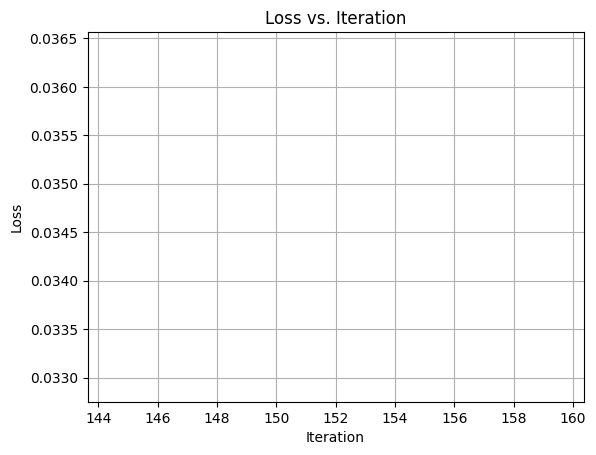

Iter 155/200 - Loss: 0.023


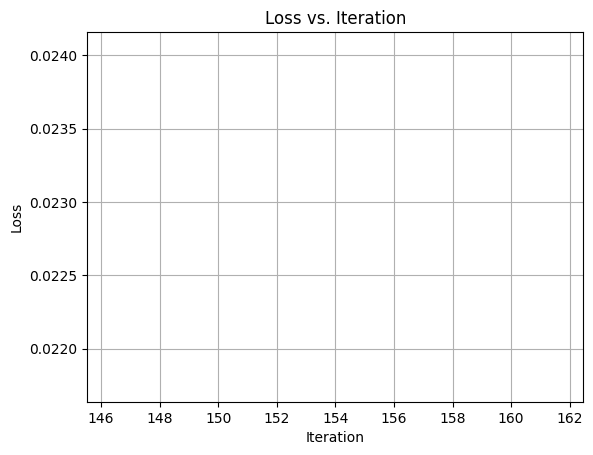

Iter 157/200 - Loss: 0.011


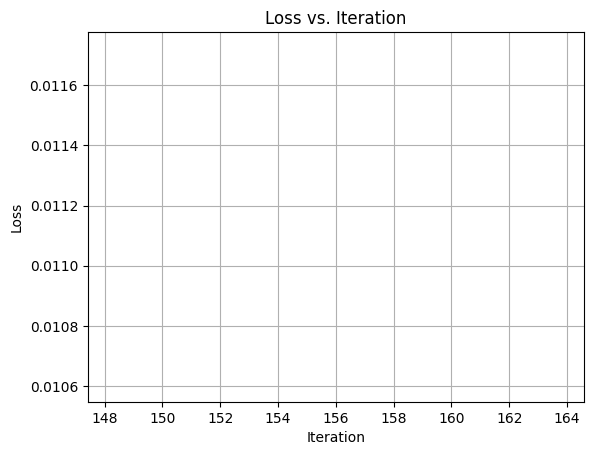

Iter 159/200 - Loss: -0.001


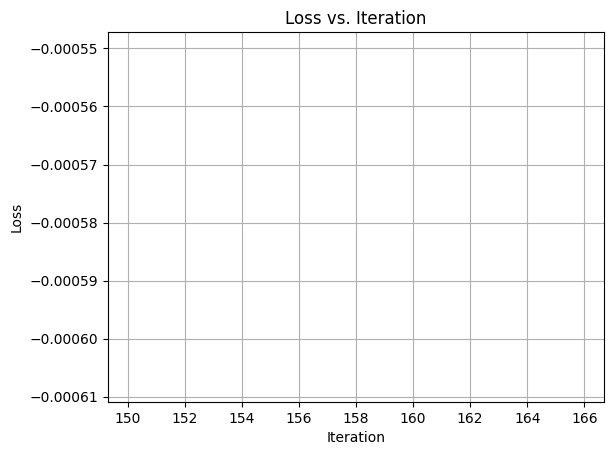

Iter 161/200 - Loss: -0.012


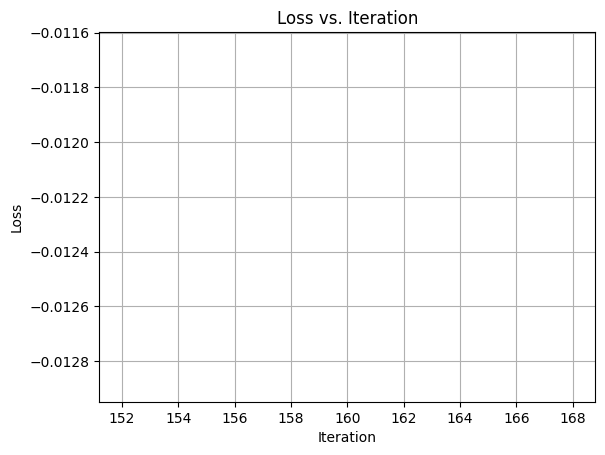

Iter 163/200 - Loss: -0.024


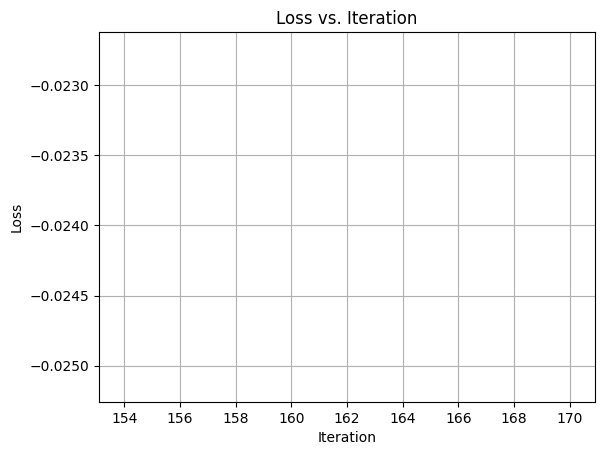

Iter 165/200 - Loss: -0.035


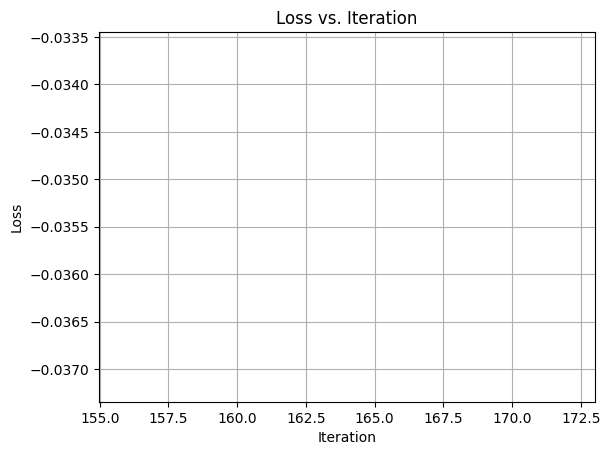

Iter 167/200 - Loss: -0.047


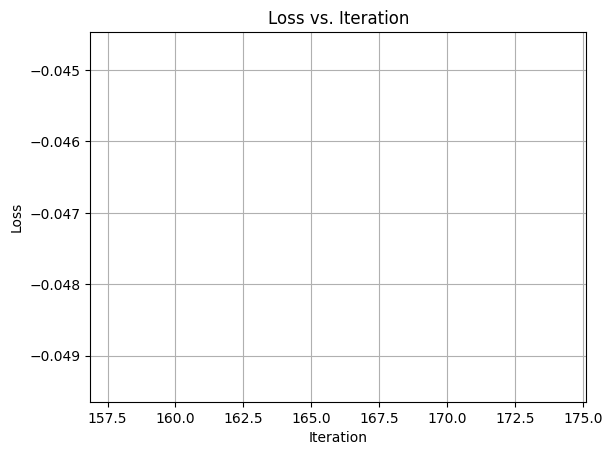

Iter 169/200 - Loss: -0.059


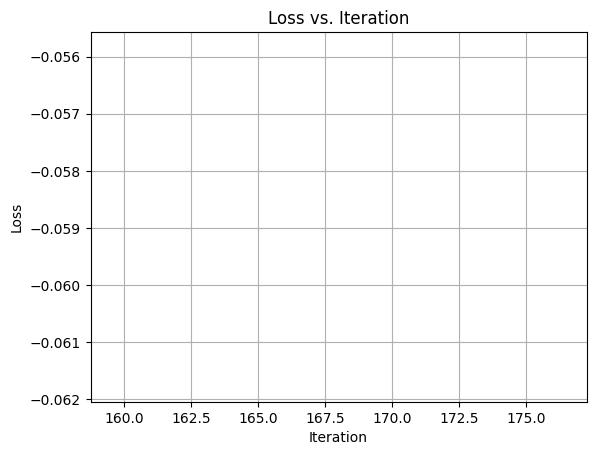

Iter 171/200 - Loss: -0.070


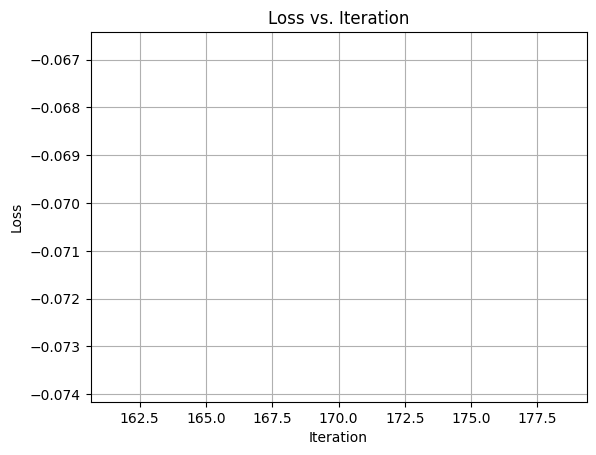

Iter 173/200 - Loss: -0.081


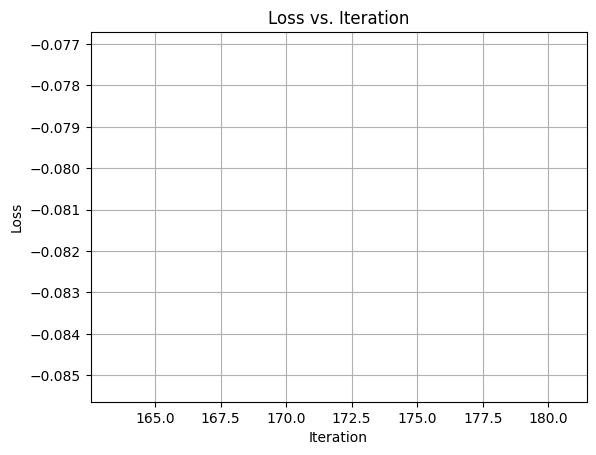

Iter 175/200 - Loss: -0.093


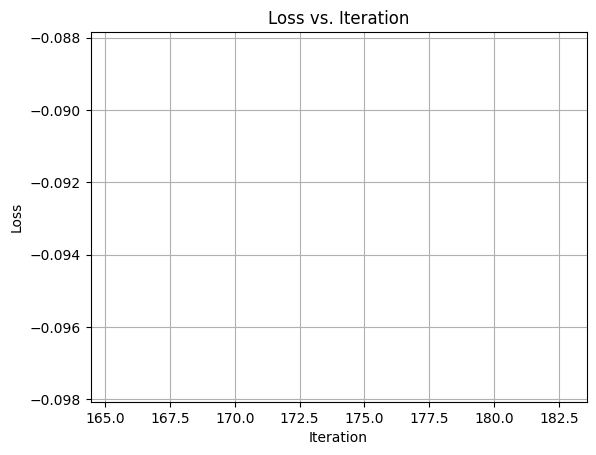

Iter 177/200 - Loss: -0.105


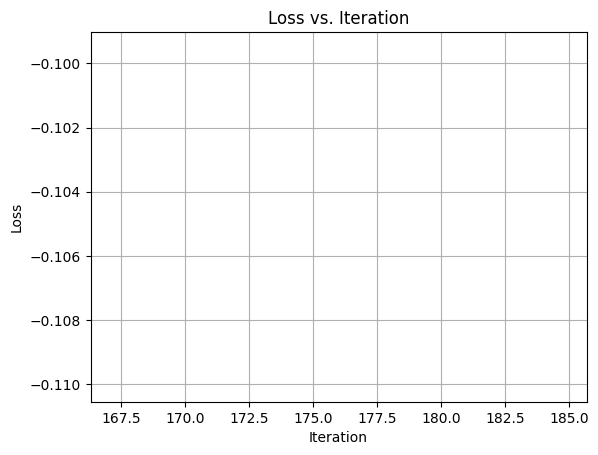

Iter 179/200 - Loss: -0.117


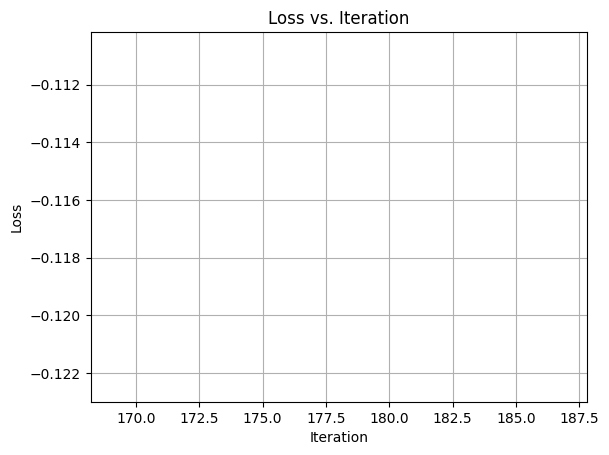

Iter 181/200 - Loss: -0.128


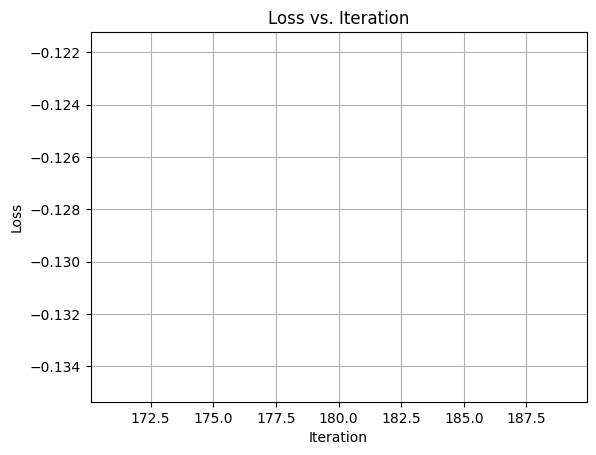

Iter 183/200 - Loss: -0.140


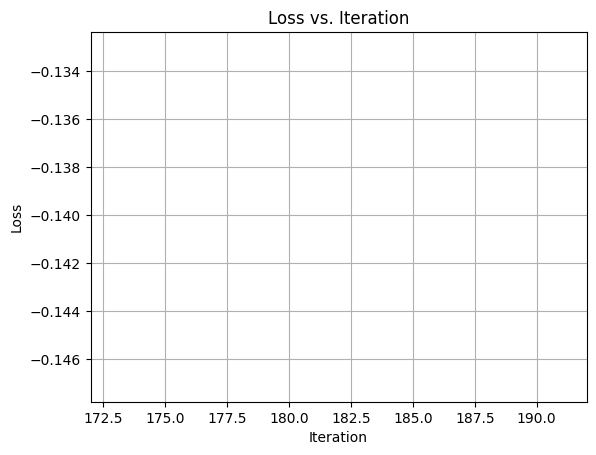

Iter 185/200 - Loss: -0.152


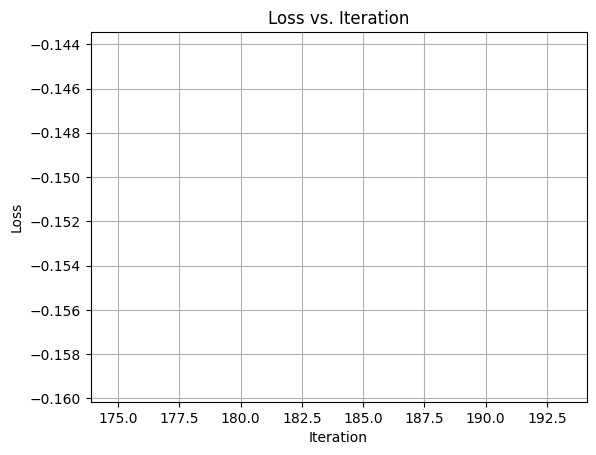

Iter 187/200 - Loss: -0.163


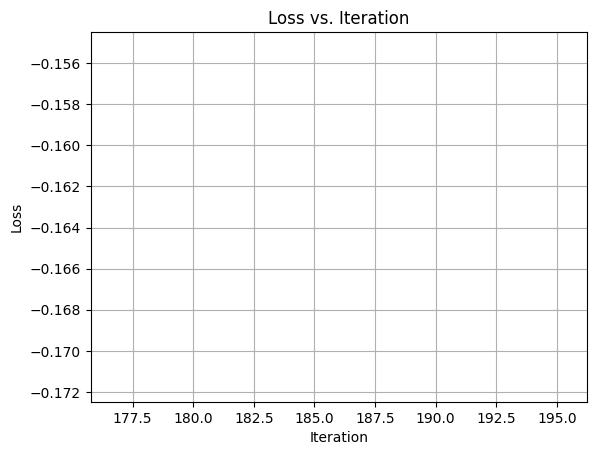

Iter 189/200 - Loss: -0.175


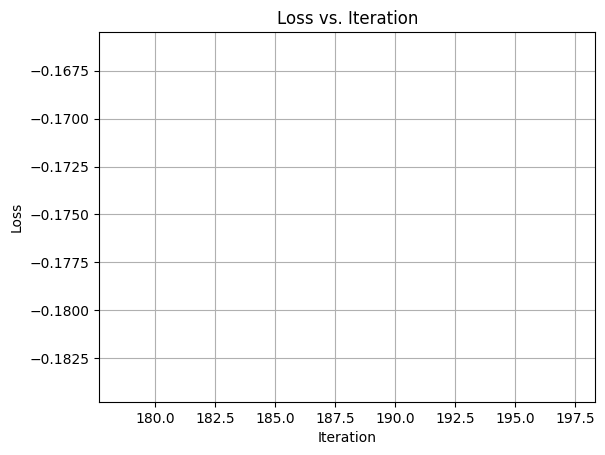

Iter 191/200 - Loss: -0.186


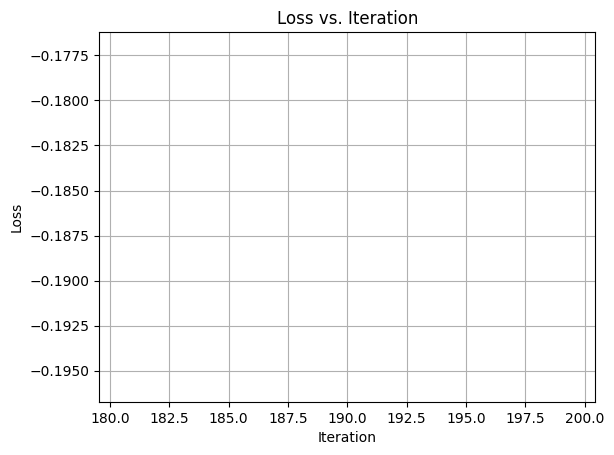

Iter 193/200 - Loss: -0.195


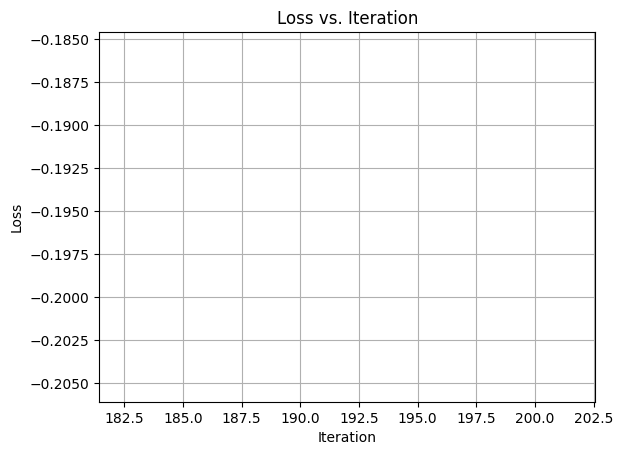

Iter 195/200 - Loss: -0.208


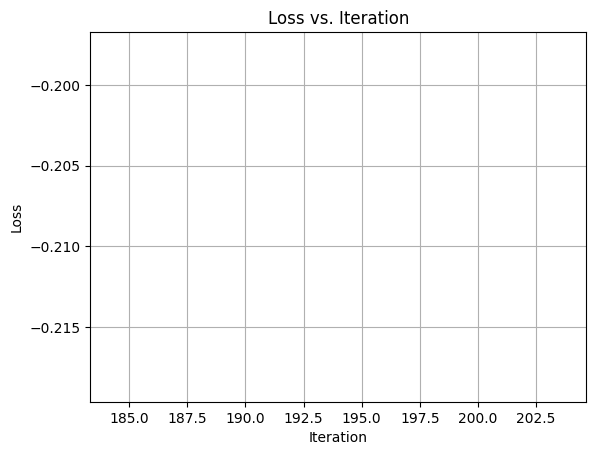

Iter 197/200 - Loss: -0.219


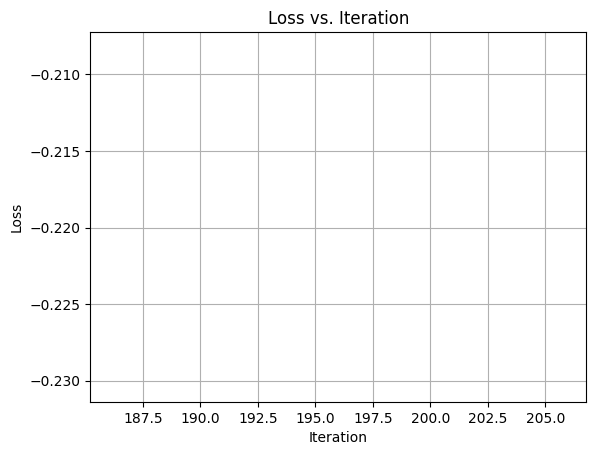

Iter 199/200 - Loss: -0.232


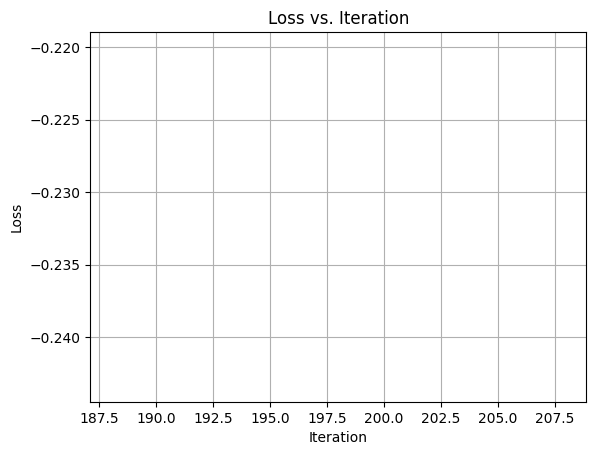

In [ ]:
# Switch to training mode
model.train()
likelihood.train()

# Define optimizer and loss (Variational ELBO)
optimizer = torch.optim.Adam([
    {'params': model.parameters()},
    {'params': likelihood.parameters()},
], lr=0.01)

# Variational ELBO objective
mll = gpytorch.mlls.VariationalELBO(likelihood, model, num_data=train_y.size(0))

# Training loop
num_iterations = 200
for i in range(num_iterations):
    optimizer.zero_grad()
    output = model(train_x)
    loss = -mll(output, train_y)
    loss.backward()
    optimizer.step()

    if i % 2 == 0:
        print(f'Iter {i + 1}/{num_iterations} - Loss: {loss.item():.3f}')
        plt.plot(i, loss.detach().numpy())
        plt.xlabel("Iteration")
        plt.ylabel("Loss")
        plt.title("Loss vs. Iteration")
        plt.grid(True)
        plt.show()




In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Switch to evaluation mode
model.eval()
likelihood.eval()



# Make predictions
with torch.no_grad(), gpytorch.settings.fast_pred_var():
    test_preds = likelihood(model(test_x))
    mean = test_preds.mean
    lower, upper = test_preds.confidence_region()

# Print a few results
print(f"Predicted Mean: {mean[:10]}")
print(f"Lower Bound: {lower[:10]}")
print(f"Upper Bound: {upper[:10]}")


# Convert predictions and true values to NumPy for performance metrics
mean_np = mean.numpy()
test_y_np = test_y.numpy()

# Calculate performance metrics
mae = mean_absolute_error(test_y_np, mean_np)
mse = mean_squared_error(test_y_np, mean_np)
r2 = r2_score(test_y_np, mean_np)

# Print performance metrics
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R²): {r2:.4f}")


In [ ]:
def vpbo_loop1(trials, split_num, liminit, fcores, afcores, refcores, data, test_data):
    trialspltvar = trials #epochs actually
    splitvar = split_num  #number of splits the data will be in. In our case, four splits

    div = int(dim/splitvar)    #dim is total number of features
    #sf = scaling_factor
    x0 = np.random.uniform(splitvar, dim)

    x = liminit*np.ones((splitvar, dim))
    lwr = x.copy()
    upr = x.copy()+1e-6
    mll = {}
    gp = {}
    acq_fun = {}
    bnds_var = {}
# Simulate BO
    for i in range(splitvar):
        if fcores == 1:
                Xbs[0] = x
        else:
                for i in range(fcores-1):
                    Xbs[i] = x[i*splt:(i+1)*splt, :]
                Xbs[-1] = x[(i+1)*splt:, :]

        feature_cols=filtered_correlations(data, label_col[i+1]).index.intersection(input_variables)
        # Initialize train/test data
        test_data = test_data

        #data = data.sample(frac=1.)

        X = data[feature_cols].to_numpy()
        y = data[label_col[i+1]].to_numpy()

        X_train = torch.from_numpy(X[:-test_data])
        y_train = torch.from_numpy(y[:-test_data])

        X_test = torch.from_numpy(X[-test_data:])
        y_test = torch.from_numpy(y[-test_data:])
        # Add an extra dimension to Y_train and Y_test
        y_train = y_train.unsqueeze(1)  # Shape: [13059, 1]
        y_test = y_test.unsqueeze(1)    # Shape: [2000, 1]

        print(f"X-Train set: {X_train.shape}")
        print(f"Y-Train set: {y_train.shape}")
        print(f"X-Test set: {X_test.shape}")
        print(f"Y-Test set: {y_test.shape}")



        # 1. Create a new GP with the best setup
        gp[str(i+1)], mll[str(i+1)] = get_gp(
            X_train,
            y_train,
            ConstantMean(),
            ScaleKernel(RBFKernel()),
            GaussianLikelihood()
        )

        mll[str(i+1)] = fit_gpytorch_mll(mll[str(i+1)])
        bnds_var[str(i+1)] = Bounds(lwr[i], upr[i])
        # 2. Define and optimize an acquisition function
        acq_fun[str(i+1)] = ExpectedImprovement(model=gp[str(i+1)],
                                                best_f=torch.min(y_train))

        X_new, acqf_val  = Parallel(n_jobs = afcores)(delayed(optimize_acqf(
                                                                    acq_fun[str(i+1)],
                                                                    bounds=bounds,
                                                                    q=1, num_restarts=5,raw_samples=20,
                                                                    inequality_constraints=ineq_constraint
                                                                    )
                                                        )
                                                    for x_0 in x0)

        X_new = torch.round(X_new, decimals=1)

          # 3.a (Optional) Find the closes test point
        best_idx = -1
        best_dist = np.inf
        for idx, test_point in enumerate(X_test):
            cur_dist = euclidean(X_new.squeeze(), test_point)
            if cur_dist < best_dist:
                best_dist = cur_dist
                best_idx = idx

        # 3.b Update the dataset by adding the new point
        X_test_new = X_test[best_idx]
        y_test_new = y_test[best_idx]

        # Remove from test set
        # Remove from test set
        X_test = torch.cat((X_test[:best_idx], X_test[best_idx + 1:]))
        y_test = torch.cat((y_test[:best_idx], y_test[best_idx + 1:]))

        print(f"Round: {i}")
        print(f" - New experimental point: {X_new}")
        print(f" - New acquisition value: {acqf_val}")
        print(f" - Test point: {X_test_new}")
        print(f" - Test evaluation: {y_test_new}")
        print(F" - Dataset shape: {X_train.shape[0]}")
        print("")

        X_train = torch.vstack((X_train, X_test_new))
        y_train = torch.vstack((y_train, y_test_new))

        '''
          X_test_new = np.array([res.x for res in opt], dtype = 'float')
          acqf_val = np.array([np.atleast_1d(res.fun)[0] for res in opt])
          X_test_new[i] = X_test_new[np.argmin(acqf_val)]
          X_test_new[-1, i*div:(i+1)*div] = X_test_new[np.argmin(acqf_val), i*div:(i+1)*div]

          X_new_best = np.array(np.ones(fcores), dtype = tuple)
'''

        for j in range(splitvar):
             if any(y_test_new[:,j] < min(y[:,j])):
                lwr[j] = X_test_new[np.argmin(y_test_new[:, j])]
                lwr[j, j*div:(j+1)*div] = bounds.lb[j]
                upr[j] = X_test_new[np.argmin(y_test_new[:, j])]+1e-6
                upr[j, j*div:(j+1)*div] = bounds.ub[j]

        for j in range(splitvar):
            mll[str(j+1)] = fit_gpytorch_mll(mll[str(j+1)])
            bnds_var[str(j+1)] = Bounds(lwr[j], upr[j])
            acq_fun[str(j+1)] = ExpectedImprovement(model=gp[str(j+1)],
                                                best_f=torch.min(y_train))
            [str(j+1)].fit(x, eps[:, j])
            X_test_new, acqf_val = Parallel(n_jobs = af_cores)(delayed(optimize_acqf(
                                                                    acq_fun[str(j+1)],
                                                                    bounds=bounds,
                                                                    q=1, num_restarts=5,raw_samples=20,
                                                                    inequality_constraints=ineq_constraint
                                                                    )
                                                        )
                                                    for start_point in x0)

            '''X_test_new = np.array([res.x for res in opt], dtype = 'float')
            acqf_val = np.array([np.atleast_1d(res.fun)[0] for res in opt])'''
            X_test_new[j] = X_test_new[np.argmin(acqf_val)]
            X_test_new[-1, j*div:(j+1)*div] = X_test_new[np.argmin(acqf_val), j*div:(j+1)*div]







In [ ]:
import numpy as np
from matplotlib import pyplot as pyp
from scipy.optimize import minimize, Bounds, approx_fprime, NonlinearConstraint
from joblib import Parallel, delayed
import sklearn.gaussian_process as gpr
from collections import OrderedDict
import time


In [ ]:
import numpy as np
import torch
import time
from joblib import Parallel, delayed
from sklearn.gaussian_process import GaussianProcessRegressor as GPR
from scipy.optimize import minimize, Bounds

class MyOptimizer:
    def __init__(self, train_x, train_y, bounds, kernel, exp_w):
        self.train_x = train_x
        self.train_y = train_y
        self.bounds = bounds  # Bounds for input variables
        self.kernel = kernel  # Kernel for GPR
        self.exp_w = exp_w    # Weighting for exploration/exploitation in acquisition function
        self.dim = train_x.shape[1]
        self.args = []
        self.ref_args = []
        self.dist_ref = {}  # For reference models

    def distmod(self, x, *args):
        """
        This is a placeholder function for the GP model.
        Replace this function with actual logic for your model, using self.train_x and self.train_y.
        """
        # Example GP using train_x and train_y
        model = GPR(kernel=self.kernel, alpha=1e-6, n_restarts_optimizer=10, normalize_y=True)
        model.fit(self.train_x, self.train_y)
        return model.predict(x)  # Predicting at new x

    def descale(self, x):
        m = (self.ub-self.lb)/(self.bounds.ub-self.bounds.lb)
        b = self.ub-m*self.bounds.ub
        return m*x+b

    def scale(self, x, use_self = True, lb = None, ub = None):
        if use_self:
            m = (self.bounds.ub-self.bounds.lb)/(self.ub-self.lb)
            b = self.bounds.ub-m*self.ub
        else:
            m = (self.bounds.ub-self.bounds.lb)/(ub-lb)
            b = self.bounds.ub-m*ub
        return m*x+b

    def optimizer_vpbo(self, trials, split_num, lim_init,
                         f_cores=1, af_cores=1, ref_cores=1, x_init=None):

        print('Variable Partitioned BO run...')
        start = time.time()
        self.trials_vp = trials
        splits = split_num
        self.time_vp = np.zeros(self.trials_vp)
        self.time_fvp = np.zeros(self.trials_vp)
        div = int(self.dim / splits)
        ref_mod = self.dist_ref.get('distrefmod', lambda x: 0)  # Use the reference model, or a default zero-return function

        x = lim_init * np.ones((splits, self.dim))

        lwr = x.copy()
        upr = x.copy() + 1e-6
        for i in range(splits):
            if x_init is None:
                x[i, i*div:(i+1)*div] = np.random.uniform(self.bounds['lb'],
                                                          self.bounds['ub'],
                                                          (1, div))
            else:
                x_init = x_init.reshape(1, self.dim)
                x[i, i*div:(i+1)*div] = x_init[0, i*div:(i+1)*div]
            lwr[i, i*div:(i+1)*div] = self.bounds['lb'][i]
            upr[i, i*div:(i+1)*div] = self.bounds['ub'][i]
        x = np.vstack([x, lim_init])

        init_pts = int(len(x) / splits)
        splt = int(x.shape[0] / f_cores)
        x_bs = np.array(np.ones(f_cores), dtype=tuple)

        if f_cores == 1:
            x_bs[0] = x
        else:
            for i in range(f_cores - 1):
                x_bs[i] = x[i * splt:(i + 1) * splt, :]
            x_bs[-1] = x[(i + 1) * splt:, :]

        # Run the distmod for function evaluation
        start_f = time.time()
        y = Parallel(n_jobs=f_cores)(delayed(self.distmod)(self.descale(x_s), *self.args)
                                     for x_s in x_bs)

        # Reference model evaluation
        if callable(ref_mod):
            y_ref = Parallel(n_jobs=ref_cores)(delayed(ref_mod)(self.descale(x_s), *self.ref_args)
                                               for x_s in x_bs)
            y_ref = np.vstack(y_ref[:])
        else:
            y_ref = np.zeros_like(y)

        end_f = time.time()
        self.time_fvp[0] = end_f - start_f

        # Stack outputs
        y = np.vstack(y[:])
        eps = y - y_ref
        y_bst = np.min(y, axis=0).reshape(-1, 1).T

        # Gaussian Process Models for each partition
        bnds_var = {}
        model_vp = {}
        LCB = {}

        for i in range(splits):
            model_vp[str(i + 1)] = GPR(self.kernel, alpha=1e-6, n_restarts_optimizer=10, normalize_y=True)
            model_vp[str(i + 1)].fit(x, eps[:, i])
            bnds_var[str(i + 1)] = Bounds(lwr[i], upr[i])
            LCB[str(i + 1)] = self._build_lcb_function(model_vp[str(i + 1)], i + 1)

        restarts = int(round(128 / (splits + 1), 0))
        x_nxt = x.copy()

        for i in range(self.trials_vp - init_pts):
            x0 = np.random.uniform(self.bounds.lb, self.bounds.ub, (restarts, self.dim))

            for j in range(splits):
                opt = Parallel(n_jobs=af_cores)(delayed(minimize)(LCB[str(j + 1)],
                                                                  x_0,
                                                                  method='L-BFGS-B',
                                                                  bounds=bnds_var[str(j + 1)])
                                                for x_0 in x0)
                x_nxt[j] = opt[np.argmin([res.fun for res in opt])].x

            # Function evaluations at next points
            y_nxt = Parallel(n_jobs=f_cores)(delayed(self.distmod)(self.descale(x_s), *self.args)
                                             for x_s in x_nxt)
            y_nxt = np.vstack(y_nxt[:])

            # Update best and other values
            y = np.vstack([y, y_nxt])
            y_bst = np.vstack([y_bst, np.min(y_nxt, axis=0).reshape(-1, 1).T])

        # Final output storage
        self.x_vp = self.descale(x)
        self.y_vp = y
        self.y_vpbst = y_bst

    def _build_lcb_function(self, model, partition_idx):
        """
        Build the Lower Confidence Bound acquisition function.
        """
        def lcb(x):
            mean, std = model.predict(x, return_std=True)
            return mean - self.exp_w * std
        return lcb


In [ ]:
# Assuming you have the following:
bounds = {'lb': np.zeros((2,69)), 'ub': np.ones((2,69))}  # Example bounds
kernel = None  # Replace with actual kernel for GPR
exp_w = 0.1    # Exploration weight

In [ ]:
bounds['lb']

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.]])

In [ ]:
# Instantiate and run optimization
optimizer = MyOptimizer(train_x, train_y, bounds, kernel, exp_w)
lim_init = np.ones((2,69)) # Initial limits
optimizer.optimizer_vpbo(trials=10, split_num=2, lim_init=lim_init)


NameError: name 'MyOptimizer' is not defined

In [ ]:
def vpbo_final:
  print('Variable Partitioned BO run...')
  model_vp = {}
  for i in range(splits):
    model_vp[str(i+1)] = model(kernel,
                             alpha=1e-6,
                             n_restarts_optimizer=10,
                             normalize_y=True)
    model_vp[str(i+1)].fit(x, eps[:, i])
    bnds_var[str(i+1)] = Bounds(lwr[i], upr[i])
    LCB[str(i+1)] = build_lcb_function(model_vp[str(i+1)], i+1)

In [ ]:
from joblib import Parallel, delayed
import torch
import gpytorch
from torch.utils.data import DataLoader, TensorDataset

# Assuming train_x is your input data and train_y is a list or tuple with 4 output variables
# train_y = (train_y1, train_y2, train_y3, train_y4)
# Each train_yi is a tensor corresponding to an output variable

# Function to train the model for a specific output variable
def train_model_for_output(train_x, train_y_output, inducing_points):
    model = SparseGPModel(inducing_points)
    likelihood = gpytorch.likelihoods.GaussianLikelihood()

    # Use the Adam optimizer
    optimizer = torch.optim.Adam([
        {'params': model.parameters()},
        {'params': likelihood.parameters()},
    ], lr=0.1)

    # "Loss" for GPs - the variational ELBO
    mll = gpytorch.mlls.VariationalELBO(likelihood, model, num_data=train_y_output.size(0))

    # Training loop
    model.train()
    likelihood.train()

    training_iterations = 100
    for i in range(training_iterations):
        optimizer.zero_grad()
        output = model(train_x)
        loss = -mll(output, train_y_output)
        loss.backward()
        optimizer.step()

        if i % 2 == 0:
          print(f'Iter {i + 1}/{training_iterations} - Loss: {loss.item():.3f}')

    return model, likelihood

# Define function to parallelize over different output variables
def train_for_variable(train_x, train_y_variable, batch_size=10000):
    # Split the output data into batches
    train_dataset = TensorDataset(train_x, train_y_variable)
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

    # Process each batch independently
    def process_batch(batch):
        batch_x, batch_y = batch
        inducing_points = batch_x[::16]  # Select inducing points from the batch
        model, likelihood = train_model_for_output(batch_x, batch_y, inducing_points)
        return model, likelihood

    # Train the model over batches for this particular output variable
    models = Parallel(n_jobs=2)(delayed(process_batch)(batch) for batch in train_loader)
    return models

# Now use joblib to parallelize the training over the 4 different output variables
train_y1, train_y2, train_y3 = train_y.T

# Use joblib to train models for each output variable in parallel
all_trained_models = Parallel(n_jobs=1)(
    delayed(train_for_variable)(train_x, train_y_output)
    for train_y_output in [train_y1, train_y2, train_y3]
)


KeyboardInterrupt: 